In [1001]:
import pandas as pd
data = pd.read_csv('IsusV3.csv', delimiter = ',').reset_index(drop=True)
# data = pd.read_csv('IsusV2forTrain.csv', delimiter = ',').reset_index(drop=True)
# data
# dataIsusV2forTrain
train = pd.read_csv('train.csv', delimiter = ',').reset_index(drop=True)
test = pd.read_csv('test.csv', delimiter = ',').reset_index(drop=True)

In [1002]:
print(train.shape,test.shape)

(8576, 136) (2144, 136)


In [4]:
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score
import pandas as pd

park = pd.read_csv('park_1.csv', delimiter = ',').reset_index(drop=True)
f1_score(y_train, y_pre_2, average='binary')

In [20]:
park

,row_id,Prediction,Actual,test
0,0,0.303171,1,
1,1,0.239810,0,
2,2,0.375598,0,
3,3,0.181755,1,
4,4,0.209790,0,
5,5,0.751699,1,
6,6,0.302520,0,
7,7,0.735293,1,
8,8,0.254448,0,
9,9,0.455887,0,


In [1]:
data1 = data.drop(['Target','TotalSum_amt'], axis=1).fillna(0)
# data1 = data1.values
y = data[['Target']].values
data1.shape
# y
x_train_ = train.drop(['Target'], axis=1).fillna(0)
y_train = train[['Target']].values

x_test_ = test.drop(['Target'], axis=1).fillna(0)
y_test = test[['Target']].values
x1 = pd.concat([x_train_, x_test_])


NameError: name 'data' is not defined

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder(LabelEncoder):
    """
    Wraps sklearn LabelEncoder functionality for use on multiple columns of a
    pandas dataframe.

    """
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, dframe):
        """
        Fit label encoder to pandas columns.

        Access individual column classes via indexig `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            for idx, column in enumerate(self.columns):
                # fit LabelEncoder to get `classes_` for the column
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                # append this column's encoder
                self.all_encoders_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return self

    def fit_transform(self, dframe):
        """
        Fit label encoder and return encoded labels.

        Access individual column classes via indexing
        `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`

        Access individual column encoded labels via indexing
        `self.all_labels_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            self.all_labels_ = np.ndarray(shape=self.columns.shape,
                                          dtype=object)
            for idx, column in enumerate(self.columns):
                # instantiate LabelEncoder
                le = LabelEncoder()
                # fit and transform labels in the column
                dframe.loc[:, column] =\
                    le.fit_transform(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
                self.all_labels_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                dframe.loc[:, column] = le.fit_transform(
                        dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return dframe

    def transform(self, dframe):
        """
        Transform labels to normalized encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[
                    idx].transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .transform(dframe.loc[:, column].values)
        return dframe.loc[:, self.columns].values

    def inverse_transform(self, dframe):
        """
        Transform labels back to original encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        return dframe

In [1057]:
y_test.shape

(2144, 1)

In [1004]:
x = data1.to_dict('records')
x_train = x_train_.to_dict('records')
# y_train = y_train_.to_dict('records')

x_test = x_test_.to_dict('records')
# y_test = y_test_.to_dict('records')

In [1058]:


from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
# d = defaultdict(LabelEncoder)
mcle = MultiColumnLabelEncoder(columns=np.array(['New_gender'
                                                 ,'New_marital_status'
                                                 ,'New_family_income_segment_code'
                                                 ,'New_WeekDay'
                                                 ,'AdamountTile'
                                                 ,'CreditTile','DebitTile','TotalLogInTile']))
# data1.apply(lambda x: d[x.New_WeekDay].fit_transform(data1))
# encoder = MultiColumnLabelEncoder(columns = ['New_gender','New_marital_status','New_individual_income_segment_code','New_family_income_segment_code','New_WeekDay'])
# encoder.fit(x1)
mcle.fit(x1)

MultiColumnLabelEncoder(columns=array(['New_gender', 'New_marital_status',
       'New_family_income_segment_code', 'New_WeekDay', 'AdamountTile',
       'CreditTile', 'DebitTile', 'TotalLogInTile'], dtype='<U30'))

In [1059]:
mcle.transform(x_train_)
mcle.transform(x_test_)
mcle.transform(x1)

array([[0, 2, 0, ..., 1, 1, 3],
       [1, 3, 7, ..., 5, 1, 5],
       [0, 3, 0, ..., 0, 2, 5],
       ...,
       [0, 2, 6, ..., 0, 6, 4],
       [1, 1, 4, ..., 2, 6, 4],
       [0, 1, 1, ..., 5, 4, 4]], dtype=int64)

In [1060]:
x_train = x_train_.values
x_test = x_test_.values
print(x_train.shape,x_test.shape)

(8576, 135) (2144, 135)


In [1062]:
x_sm = x_train 
y_sm = y_train

In [1005]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

vec = DictVectorizer()
x = vec.fit_transform(x).toarray()
x.shape

(10720, 172)

In [1006]:
np.array(vec.get_feature_names()).shape

(172,)

In [1007]:
x_train = vec.transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()



In [1008]:
print(x_train.shape,x_test.shape)

(8576, 172) (2144, 172)


In [13]:
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components=n_components, svd_solver='full',random_state=42)
pca.fit(x)
x = pca.fit_transform(x)


print(x,y,x.shape,y.shape)

[[-63576.91703737   2782.9191994    -541.87336475 ...   -670.28859429
   -2721.05809825   -300.05856659]
 [-43608.74402376   6030.78636414   -475.28138398 ...   3102.03921887
   -5801.25723623  -1509.79978176]
 [ 24843.06453472  49860.004107      845.43314859 ...  45259.22783883
   50447.20659134  70402.38847607]
 ...
 [-50579.20829197   3370.12739174  -5192.15261753 ...  -4611.02476676
   -1598.41554993   1610.03188155]
 [-65180.65762811   5596.07592944  -1728.6282631  ...  -3374.42772674
   -1923.03149312    817.89095082]
 [-64213.8695753    2419.93884533   -377.67966346 ...  -2164.28930306
     155.40102658   2698.02419889]] [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] (10720, 27) (10720, 1)


In [14]:


x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
print(x.shape,y.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(10720, 27) (10720, 1)
(8576, 27) (8576, 1) (2144, 27) (2144, 1)


In [8]:

# x_sm, y_sm = x_train , y_train

In [172]:
x_train = x[:8000][:]
y_train = y[:8000][:]
# x_train2 = x[6000:8000][:]
# y_train2 = y[6000:8000][:]
x_val = x[8000:][:]
y_val = y[8000:][:]
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(8000, 166) (8000, 1) (2720, 166) (2720, 1)


In [1042]:
from imblearn.over_sampling import SMOTE, ADASYN
# smote = SMOTE(ratio='minority')
# sm = SMOTE(random_state=42)
sm = ADASYN(random_state=42)
# x_sm, y_sm = sm.fit_sample(x_train, y_train)
# x_sm, y_sm = x_train, y_train
x_sm, y_sm = sm.fit_sample(x_train, y_train)


print(x_sm.shape,y_sm.shape)


# x_sm2, y_sm2 = sm.fit_sample(x_train2, y_train2)
# print(x_sm2.shape,y_sm2.shape)

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(16055, 135) (16055,)


In [298]:

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_sm.shape)

(8576, 135) (8576, 1) (2144, 135) (2144, 1) (8576, 135)


In [161]:
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components=n_components, svd_solver='full',random_state=42)
pca.fit(x1)

x_sm = pca.transform(x_sm)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
# print(x.shape,y.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

AttributeError: 'list' object has no attribute 'shape'

In [1048]:
x_val = x_test
y_val = y_test

In [375]:
import os
import numpy as np
import datetime

import scipy.stats as st

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from xgboost import XGBClassifier
from sklearn.externals import joblib
import catboost as cb

from lightgbm.sklearn import LGBMClassifier

n_jobs = 3
n_iter = 50
n_iter_nt = 3
n_components = 25
cv = 5
seed=42
n_features= x_sm.shape[1]
# n_features= n_components
is_pca = False
# is_pca = True

In [143]:
pca = PCA(n_components=20, svd_solver='full',random_state=42)
pca.fit(x_sm)
fitt = pca.fit_transform(x_sm)
fitt.shape

(15096, 20)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA ,NMF
from sklearn.feature_selection import SelectKBest, chi2
# nmf = NMF(n_components=5, init='random', random_state=42)

# C_OPTIONS = [1, 10, 100, 1000]
N_FEATURES_OPTIONS = [20, 25]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
#         'classify__C': C_OPTIONS
    }
]

pca = PCA(n_components=25, svd_solver='full',random_state=42)
estimators = [('reduce_dim',pca ), ('lgb', xgb)]
pipe = Pipeline(estimators)
pipe

grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid)
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=25, random_state=42,
  svd_solver='full', tol=0.0, whiten=False)), ('lgb', RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_...obs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'reduce_dim': [PCA(copy=True, iterated_power=7, n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)], 'reduce_dim__n_components': [20, 25]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [505]:
# from sklearn.feature_extraction import DictVectorizer
# v = DictVectorizer(sparse=False)
# d = [{'height': 1, 'length': 0, 'width': 1},{'height': 2, 'length': 1, 'width': 0},{'height': 1, 'length': 3, 'width': 2}]
# v.fit_transform(d)


JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000027CF5564DB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\E...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000027CF5564DB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\E...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(1032, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(1032, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (1032, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=1032, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 36, 36, 530402, tzinfo=tzutc()), 'msg_id': '7332a693bd6945fb84f57e678dd22a10', 'msg_type': 'execute_request', 'session': '9e6f204c3a894622813cb47ff1ea5751', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7332a693bd6945fb84f57e678dd22a10', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9e6f204c3a894622813cb47ff1ea5751']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 36, 36, 530402, tzinfo=tzutc()), 'msg_id': '7332a693bd6945fb84f57e678dd22a10', 'msg_type': 'execute_request', 'session': '9e6f204c3a894622813cb47ff1ea5751', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7332a693bd6945fb84f57e678dd22a10', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9e6f204c3a894622813cb47ff1ea5751'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 36, 36, 530402, tzinfo=tzutc()), 'msg_id': '7332a693bd6945fb84f57e678dd22a10', 'msg_type': 'execute_request', 'session': '9e6f204c3a894622813cb47ff1ea5751', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '7332a693bd6945fb84f57e678dd22a10', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="# from sklearn.feature_extraction import DictVec...rain, y_pre_2, average='binary')\nprint(f1_1,f1_2)", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-505-32e1ccba44ff>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 27c837b5048, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000027C83CB79C0, file "<ipython-input-505-32e1ccba44ff>", line 7>
        result = <ExecutionResult object at 27c837b5048, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000027C83CB79C0, file "<ipython-input-505-32e1ccba44ff>", line 7>, result=<ExecutionResult object at 27c837b5048, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000027C83CB79C0, file "<ipython-input-505-32e1ccba44ff>", line 7>
        self.user_global_ns = {'ADASYN': <class 'imblearn.over_sampling.adasyn.ADASYN'>, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", 'y_test.shape', "x = data1.to_dict('records')\nx_train = x_train_....('records')\n# y_test = y_test_.to_dict('records')", 'x', 'data1', 'df.apply(lambda x: d[data1.New_WeekDay].fit_transform(data1))', 'from collections import defaultdict\nd = defaultd...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'from sklearn.preprocessing import LabelEncoder\nf...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'class MultiColumnLabelEncoder:\n    def __init__(...):\n        return self.fit(X,y).transform(X)\n    ', 'import pandas as pd\nfrom sklearn.preprocessing i...):\n        return self.fit(X,y).transform(X)\n    ', "\n\nfrom sklearn.preprocessing import LabelEncoder...r(columns = ['New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...egment_code','New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", "MultiColumnLabelEncoder(columns = ['New_gender',...segment_code','New_WeekDay']).transform(x_train_)", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LGBMClassifier': <class 'lightgbm.sklearn.LGBMClassifier'>, 'LabelBinarizer': <class 'sklearn.preprocessing.label.LabelBinarizer'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, ...}
        self.user_ns = {'ADASYN': <class 'imblearn.over_sampling.adasyn.ADASYN'>, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", 'y_test.shape', "x = data1.to_dict('records')\nx_train = x_train_....('records')\n# y_test = y_test_.to_dict('records')", 'x', 'data1', 'df.apply(lambda x: d[data1.New_WeekDay].fit_transform(data1))', 'from collections import defaultdict\nd = defaultd...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'from sklearn.preprocessing import LabelEncoder\nf...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'class MultiColumnLabelEncoder:\n    def __init__(...):\n        return self.fit(X,y).transform(X)\n    ', 'import pandas as pd\nfrom sklearn.preprocessing i...):\n        return self.fit(X,y).transform(X)\n    ', "\n\nfrom sklearn.preprocessing import LabelEncoder...r(columns = ['New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...egment_code','New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", "MultiColumnLabelEncoder(columns = ['New_gender',...segment_code','New_WeekDay']).transform(x_train_)", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LGBMClassifier': <class 'lightgbm.sklearn.LGBMClassifier'>, 'LabelBinarizer': <class 'sklearn.preprocessing.label.LabelBinarizer'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
D:\techjam\<ipython-input-505-32e1ccba44ff> in <module>()
      2 # v = DictVectorizer(sparse=False)
      3 # d = [{'height': 1, 'length': 0, 'width': 1},{'height': 2, 'length': 1, 'width': 0},{'height': 1, 'length': 3, 'width': 2}]
      4 # v.fit_transform(d)
      5 from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score
      6 model = cat
----> 7 model.fit(x_sm, y_sm)
      8 y_pre = model.predict(x_test)
      9 f1_1  = f1_score(y_test, y_pre, average='binary')
     10 y_pre_2 = model.predict(x_train)
     11 f1_2  = f1_score(y_train, y_pre_2, average='binary')

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=5, error_score='raise',
  ...turn_train_score='warn', scoring='f1', verbose=0), X=array([[0.48979592, 0.33333333, 0.62135922, ...,....., 2.        , 4.        ,
        4.        ]]), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>
        X = array([[0.48979592, 0.33333333, 0.62135922, ...,....., 2.        , 4.        ,
        4.        ]])
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=3), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=3)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Wed Sep 26 12:36:39 2018
PID: 88               Python 3.6.5: C:\Users\EBM_IT_01\Anaconda3\python.exe
...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (<catboost.core.CatBoostClassifier object>, memmap([[0.48979592, 0.33333333, 0.62135922, ......., 2.        , 4.        ,
         4.        ]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), {'score': make_scorer(f1_score)}, array([1716, 1717, 1718, ..., 8573, 8574, 8575]), array([   0,    1,    2, ..., 1713, 1714, 1715]), 0, {'depth': 14, 'iterations': 1, 'l2_leaf_reg': 3, 'learning_rate': 0.06860771438494857}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (<catboost.core.CatBoostClassifier object>, memmap([[0.48979592, 0.33333333, 0.62135922, ......., 2.        , 4.        ,
         4.        ]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), {'score': make_scorer(f1_score)}, array([1716, 1717, 1718, ..., 8573, 8574, 8575]), array([   0,    1,    2, ..., 1713, 1714, 1715]), 0, {'depth': 14, 'iterations': 1, 'l2_leaf_reg': 3, 'learning_rate': 0.06860771438494857})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=<catboost.core.CatBoostClassifier object>, X=memmap([[0.48979592, 0.33333333, 0.62135922, ......., 2.        , 4.        ,
         4.        ]]), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), scorer={'score': make_scorer(f1_score)}, train=array([1716, 1717, 1718, ..., 8573, 8574, 8575]), test=array([   0,    1,    2, ..., 1713, 1714, 1715]), verbose=0, parameters={'depth': 14, 'iterations': 1, 'l2_leaf_reg': 3, 'learning_rate': 0.06860771438494857}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method CatBoostClassifier.fit of <catboost.core.CatBoostClassifier object>>
        X_train = memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]])
        y_train = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\catboost\core.py in fit(self=<catboost.core.CatBoostClassifier object>, X=memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]]), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), cat_features=None, sample_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None, metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None)
   2114         if 'loss_function' in params:
   2115             self._check_is_classification_loss(params['loss_function'])
   2116 
   2117         self._fit(X, y, cat_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
   2118                   eval_set, verbose, logging_level, plot, column_description, verbose_eval, metric_period,
-> 2119                   silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval)
        silent = None
        early_stopping_rounds = None
        save_snapshot = None
        snapshot_file = None
        snapshot_interval = None
   2120         return self
   2121 
   2122     def predict(self, data, prediction_type='Class', ntree_start=0, ntree_end=0, thread_count=-1, verbose=None):
   2123         """

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\catboost\core.py in _fit(self=<catboost.core.CatBoostClassifier object>, X=memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]]), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), cat_features=None, pairs=None, sample_weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None, metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None)
   1051 
   1052         _check_param_types(params)
   1053         params = _params_type_cast(params)
   1054         _check_train_params(params)
   1055 
-> 1056         train_pool = _build_train_pool(X, y, cat_features, pairs, sample_weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, column_description)
        train_pool = undefined
        X = memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]])
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])
        cat_features = None
        pairs = None
        sample_weight = None
        group_id = None
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
        column_description = None
   1057         if train_pool.is_empty_:
   1058             raise CatboostError("X is empty.")
   1059 
   1060         allow_clear_pool = not isinstance(X, Pool)

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\catboost\core.py in _build_train_pool(X=memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]]), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), cat_features=None, pairs=None, sample_weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, column_description=None)
    660             train_pool = Pool(data=X, pairs=pairs, column_description=column_description)
    661     else:
    662         if y is None:
    663             raise CatboostError("y has not initialized in fit(): X is not catboost.Pool object, y must be not None in fit().")
    664         train_pool = Pool(X, y, cat_features=cat_features, pairs=pairs, weight=sample_weight, group_id=group_id,
--> 665                           group_weight=group_weight, subgroup_id=subgroup_id, pairs_weight=pairs_weight, baseline=baseline)
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
    666     return train_pool
    667 
    668 
    669 def _clear_training_files(train_dir):

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\catboost\core.py in __init__(self=<catboost.core.Pool object>, data=memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]]), label=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), cat_features=None, column_description=None, pairs=None, delimiter='\t', has_header=False, weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, feature_names=None, thread_count=-1)
    290                         raise CatboostError(
    291                             "'data' is numpy array of np.float32, it means no categorical features,"
    292                             " but 'cat_features' parameter specifies nonzero number of categorical features"
    293                         )
    294 
--> 295                 self._init(data, label, cat_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names)
        self._init = <bound method Pool._init of <catboost.core.Pool object>>
        data = memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]])
        label = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])
        cat_features = None
        pairs = None
        weight = None
        group_id = None
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
        feature_names = None
    296         super(Pool, self).__init__()
    297 
    298     def _check_files(self, data, column_description, pairs):
    299         """

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\catboost\core.py in _init(self=<catboost.core.Pool object>, data=memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]]), label=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), cat_features=None, pairs=None, weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, feature_names=None)
    641             baseline = self._if_pandas_to_numpy(baseline)
    642             baseline = np.reshape(baseline, (samples_count, -1))
    643             self._check_baseline_shape(baseline, samples_count)
    644         if feature_names is not None:
    645             self._check_feature_names(feature_names, features_count)
--> 646         self._init_pool(data, label, cat_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names)
        self._init_pool = <built-in method _init_pool of Pool object>
        data = memmap([[0.44897959, 0.        , 0.55339806, ......., 2.        , 4.        ,
         4.        ]])
        label = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])
        cat_features = None
        pairs = None
        weight = None
        group_id = None
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
        feature_names = None
    647 
    648 
    649 def _build_train_pool(X, y, cat_features, pairs, sample_weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, column_description):
    650     train_pool = None

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\catboost\gpu\_catboost.pyd in _catboost._PoolBase._init_pool()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\catboost\gpu\_catboost.pyd in _catboost._PoolBase._init_pool()

TypeError: unhashable type: 'numpy.ndarray'
___________________________________________________________________________

In [1063]:
x_sm0 = x_sm[:6500]
x_val0 = x_sm[6500:]
y_sm0 = y_sm[:6500]
y_val0 = y_sm[6500:]

In [1064]:
print(x_sm.shape,x_sm0.shape,y_sm0.shape,x_val0.shape,y_val0.shape)

(8576, 135) (6500, 135) (6500, 1) (2076, 135) (2076, 1)


In [1090]:
import xgboost as xgb
dsm = xgb.DMatrix(x_sm0, label=y_sm0)
dv0 = xgb.DMatrix(x_val0, label=y_val0)
dt = xgb.DMatrix(x_test, label=y_test)
dtrain = xgb.DMatrix(x_train, label=y_train)
evallist = [(dv0, 'eval'), (dsm, 'train')]
                  
dsm = xgb.DMatrix(x_sm, label=y_sm)                  
evallist = [(dt, 'eval'), (dsm, 'train')]
                  
num_round = 10000
# binary:logistic
param = {'objective': 'binary:logistic',
 'colsample_bytree': 0.9683760122352089,
 'gamma': 0.7790711924812199,
 'learning_rate': 0.2249426498504554,
 'max_depth': 20,
 'min_child_weight': 10.95324500379702,
 'n_estimators': 150,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'seed': 42,
 'eval_metric': ['auc'],
 'lambda': 2,
 'alpha': 15,
#  'rate_drop':0.5,
 'tree_method':'exact',
 'normalize_type':'forest',
 'subsample': 0.9035691355661921}
 
evals_result = {}


In [1091]:
bst = xgb.train(param, dsm, num_round, evallist, evals_result=evals_result,early_stopping_rounds=1000)

[17:09:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[0]	eval-auc:0.5	train-auc:0.5
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 1000 rounds.
[17:09:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1]	eval-auc:0.5	train-auc:0.5
[17:09:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[2]	eval-auc:0.522904	train-auc:0.520259
[17:09:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3]	eval-auc:0.522904	train-auc:0.520259
[17:09:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 ex

[17:09:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[43]	eval-auc:0.653663	train-auc:0.754046
[17:09:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[44]	eval-auc:0.653663	train-auc:0.754046
[17:09:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[45]	eval-auc:0.652992	train-auc:0.754785
[17:09:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[46]	eval-auc:0.653863	train-auc:0.755476
[17:09:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[47]	eval-auc:0.65249	train-auc:0.756384
[17:09:31] C:\Users\Administrator\Deskt

[85]	eval-auc:0.658747	train-auc:0.785801
[17:09:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[86]	eval-auc:0.659104	train-auc:0.785881
[17:09:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[87]	eval-auc:0.660596	train-auc:0.786098
[17:09:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=3
[88]	eval-auc:0.660324	train-auc:0.787753
[17:09:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=2
[89]	eval-auc:0.661434	train-auc:0.788126
[17:09:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[90]	eval-auc:0.661434	train-auc:0.78

[170]	eval-auc:0.655385	train-auc:0.811491
[17:09:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[171]	eval-auc:0.655385	train-auc:0.811491
[17:09:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[172]	eval-auc:0.655385	train-auc:0.811491
[17:09:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[173]	eval-auc:0.655385	train-auc:0.811491
[17:09:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[174]	eval-auc:0.655385	train-auc:0.811491
[17:09:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=3
[175]	eval-auc:0.654849	train-

[17:09:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[214]	eval-auc:0.65144	train-auc:0.814631
[17:09:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[215]	eval-auc:0.65144	train-auc:0.814631
[17:09:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=4
[216]	eval-auc:0.649825	train-auc:0.814584
[17:09:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[217]	eval-auc:0.649825	train-auc:0.814584
[17:09:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[218]	eval-auc:0.649583	train-auc:0.815472
[17:09:40] C:\Users\Administrator\

[256]	eval-auc:0.651355	train-auc:0.820498
[17:09:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[257]	eval-auc:0.651355	train-auc:0.820498
[17:09:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[258]	eval-auc:0.651355	train-auc:0.820498
[17:09:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[259]	eval-auc:0.651355	train-auc:0.820498
[17:09:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[260]	eval-auc:0.651355	train-auc:0.820498
[17:09:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[261]	eval-auc:0.651355	train-a

[299]	eval-auc:0.65005	train-auc:0.822097
[17:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[300]	eval-auc:0.649391	train-auc:0.821929
[17:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[301]	eval-auc:0.649391	train-auc:0.821929
[17:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[302]	eval-auc:0.649391	train-auc:0.821929
[17:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[303]	eval-auc:0.650105	train-auc:0.822189
[17:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=4
[304]	eval-auc:0.650348	train-auc:0

[17:09:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[343]	eval-auc:0.648369	train-auc:0.825421
[17:09:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[344]	eval-auc:0.648369	train-auc:0.825421
[17:09:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[345]	eval-auc:0.648369	train-auc:0.825421
[17:09:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[346]	eval-auc:0.648369	train-auc:0.825421
[17:09:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[347]	eval-auc:0.648369	train-auc:0.825421
[17:09:46] C:\Users\Administrator

[17:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[386]	eval-auc:0.650467	train-auc:0.831743
[17:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[387]	eval-auc:0.650467	train-auc:0.831743
[17:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[388]	eval-auc:0.650467	train-auc:0.831743
[17:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[389]	eval-auc:0.650467	train-auc:0.831743
[17:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[390]	eval-auc:0.650467	train-auc:0.831743
[17:09:48] C:\Users\Administrator

[17:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[429]	eval-auc:0.650977	train-auc:0.832426
[17:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[430]	eval-auc:0.650977	train-auc:0.832426
[17:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[431]	eval-auc:0.650237	train-auc:0.832626
[17:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[432]	eval-auc:0.650237	train-auc:0.832626
[17:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[433]	eval-auc:0.650237	train-auc:0.832626
[17:09:50] C:\Users\Administrator

[17:09:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[472]	eval-auc:0.648652	train-auc:0.834471
[17:09:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[473]	eval-auc:0.648652	train-auc:0.834471
[17:09:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[474]	eval-auc:0.648652	train-auc:0.834471
[17:09:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[475]	eval-auc:0.648652	train-auc:0.834471
[17:09:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[476]	eval-auc:0.648652	train-auc:0.834471
[17:09:52] C:\Users\Administrator\

[17:09:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[515]	eval-auc:0.648069	train-auc:0.83601
[17:09:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[516]	eval-auc:0.648069	train-auc:0.83601
[17:09:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[517]	eval-auc:0.648069	train-auc:0.83601
[17:09:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[518]	eval-auc:0.648069	train-auc:0.83601
[17:09:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[519]	eval-auc:0.648069	train-auc:0.83601
[17:09:53] C:\Users\Administrator\Deskt

[17:09:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[558]	eval-auc:0.647181	train-auc:0.837667
[17:09:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[559]	eval-auc:0.647181	train-auc:0.837667
[17:09:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[560]	eval-auc:0.647181	train-auc:0.837667
[17:09:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[561]	eval-auc:0.647181	train-auc:0.837667
[17:09:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[562]	eval-auc:0.647181	train-auc:0.837667
[17:09:55] C:\Users\Administrato

[600]	eval-auc:0.647823	train-auc:0.838127
[17:09:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[601]	eval-auc:0.647823	train-auc:0.838127
[17:09:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[602]	eval-auc:0.647823	train-auc:0.838127
[17:09:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[603]	eval-auc:0.647823	train-auc:0.838127
[17:09:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[604]	eval-auc:0.647823	train-auc:0.838127
[17:09:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[605]	eval-auc:0.647844	train-auc

[17:09:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[644]	eval-auc:0.645451	train-auc:0.841376
[17:09:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[645]	eval-auc:0.645451	train-auc:0.841376
[17:09:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[646]	eval-auc:0.645451	train-auc:0.841376
[17:09:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[647]	eval-auc:0.645451	train-auc:0.841376
[17:09:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[648]	eval-auc:0.645451	train-auc:0.841376
[17:09:59] C:\Users\Administrato

[17:10:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[687]	eval-auc:0.644103	train-auc:0.843769
[17:10:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[688]	eval-auc:0.644103	train-auc:0.843769
[17:10:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[689]	eval-auc:0.644103	train-auc:0.843769
[17:10:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[690]	eval-auc:0.64341	train-auc:0.843912
[17:10:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[691]	eval-auc:0.64341	train-auc:0.843912
[17:10:00] C:\Users\Administrator\De

[17:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[772]	eval-auc:0.641986	train-auc:0.852129
[17:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[773]	eval-auc:0.641986	train-auc:0.852129
[17:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[774]	eval-auc:0.641986	train-auc:0.852129
[17:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[775]	eval-auc:0.641986	train-auc:0.852129
[17:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[776]	eval-auc:0.641986	train-auc:0.852129
[17:10:04] C:\Users\Administrato

[17:10:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[815]	eval-auc:0.641302	train-auc:0.853519
[17:10:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[816]	eval-auc:0.641302	train-auc:0.853519
[17:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[817]	eval-auc:0.641302	train-auc:0.853519
[17:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[818]	eval-auc:0.641302	train-auc:0.853519
[17:10:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[819]	eval-auc:0.641502	train-auc:0.853455
[17:10:06] C:\Users\Administrator\

[17:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[858]	eval-auc:0.644001	train-auc:0.855809
[17:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[859]	eval-auc:0.644001	train-auc:0.855809
[17:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[860]	eval-auc:0.644001	train-auc:0.855809
[17:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[861]	eval-auc:0.644001	train-auc:0.855809
[17:10:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[862]	eval-auc:0.644363	train-auc:0.85709
[17:10:07] C:\Users\Administrator\

[17:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[901]	eval-auc:0.643457	train-auc:0.857535
[17:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[902]	eval-auc:0.643457	train-auc:0.857535
[17:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[903]	eval-auc:0.643457	train-auc:0.857535
[17:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[904]	eval-auc:0.64296	train-auc:0.857908
[17:10:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[905]	eval-auc:0.64296	train-auc:0.857908
[17:10:09] C:\Users\Administrator\D

[17:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[944]	eval-auc:0.643147	train-auc:0.858199
[17:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[945]	eval-auc:0.643147	train-auc:0.858199
[17:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[946]	eval-auc:0.643147	train-auc:0.858199
[17:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[947]	eval-auc:0.643147	train-auc:0.858199
[17:10:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[948]	eval-auc:0.643147	train-auc:0.858199
[17:10:11] C:\Users\Administrator\

[986]	eval-auc:0.642037	train-auc:0.859692
[17:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[987]	eval-auc:0.642037	train-auc:0.859692
[17:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[988]	eval-auc:0.642037	train-auc:0.859692
[17:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[989]	eval-auc:0.642037	train-auc:0.859692
[17:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[990]	eval-auc:0.642037	train-auc:0.859692
[17:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[991]	eval-auc:0.642037	train-a

[17:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1029]	eval-auc:0.641119	train-auc:0.860584
[17:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1030]	eval-auc:0.641119	train-auc:0.860584
[17:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[1031]	eval-auc:0.641119	train-auc:0.860584
[17:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1032]	eval-auc:0.641119	train-auc:0.860584
[17:10:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1033]	eval-auc:0.641119	train-auc:0.860584
[17:10:14] C:\Users\Admini

[17:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1072]	eval-auc:0.640656	train-auc:0.861184
[17:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1073]	eval-auc:0.640656	train-auc:0.861184
[17:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1074]	eval-auc:0.640656	train-auc:0.861184
[17:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1075]	eval-auc:0.640656	train-auc:0.861184
[17:10:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1076]	eval-auc:0.640656	train-auc:0.861184
[17:10:16] C:\Users\Adminis

[17:10:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[1115]	eval-auc:0.639385	train-auc:0.861694
[17:10:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1116]	eval-auc:0.639385	train-auc:0.861694
[17:10:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1117]	eval-auc:0.639385	train-auc:0.861694
[17:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1118]	eval-auc:0.639385	train-auc:0.861694
[17:10:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1119]	eval-auc:0.639385	train-auc:0.861694
[17:10:18] C:\Users\Administ

[17:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[1158]	eval-auc:0.6387	train-auc:0.86213
[17:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1159]	eval-auc:0.6387	train-auc:0.86213
[17:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[1160]	eval-auc:0.6387	train-auc:0.86213
[17:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1161]	eval-auc:0.6387	train-auc:0.86213
[17:10:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1162]	eval-auc:0.6387	train-auc:0.86213
[17:10:19] C:\Users\Administrator\Desktop\x

[17:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1201]	eval-auc:0.640371	train-auc:0.862167
[17:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1202]	eval-auc:0.640371	train-auc:0.862167
[17:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1203]	eval-auc:0.640371	train-auc:0.862167
[17:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1204]	eval-auc:0.640371	train-auc:0.862167
[17:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[1205]	eval-auc:0.640371	train-auc:0.862167
[17:10:21] C:\Users\Administr

[17:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[1244]	eval-auc:0.639376	train-auc:0.862676
[17:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1245]	eval-auc:0.639376	train-auc:0.862676
[17:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1246]	eval-auc:0.639376	train-auc:0.862676
[17:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1247]	eval-auc:0.639376	train-auc:0.862676
[17:10:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1248]	eval-auc:0.639376	train-auc:0.862676
[17:10:23] C:\Users\Adminis

[1286]	eval-auc:0.638556	train-auc:0.863272
[17:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1287]	eval-auc:0.638556	train-auc:0.863272
[17:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1288]	eval-auc:0.638556	train-auc:0.863272
[17:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1289]	eval-auc:0.638556	train-auc:0.863272
[17:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1290]	eval-auc:0.638556	train-auc:0.863272
[17:10:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1291]	eval-auc:0.638556	tr

[17:10:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1329]	eval-auc:0.638186	train-auc:0.863782
[17:10:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[1330]	eval-auc:0.63856	train-auc:0.864005
[17:10:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1331]	eval-auc:0.63856	train-auc:0.864005
[17:10:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1332]	eval-auc:0.63856	train-auc:0.864005
[17:10:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[1333]	eval-auc:0.63856	train-auc:0.864005
[17:10:26] C:\Users\Administrat

[17:10:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1372]	eval-auc:0.638275	train-auc:0.867051
[17:10:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1373]	eval-auc:0.638275	train-auc:0.867051
[17:10:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1374]	eval-auc:0.638275	train-auc:0.867051
[17:10:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1375]	eval-auc:0.638275	train-auc:0.867051
[17:10:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1376]	eval-auc:0.638275	train-auc:0.867051
[17:10:27] C:\Users\Administr

[17:10:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1457]	eval-auc:0.639164	train-auc:0.86849
[17:10:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1458]	eval-auc:0.639164	train-auc:0.86849
[17:10:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1459]	eval-auc:0.639164	train-auc:0.86849
[17:10:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1460]	eval-auc:0.639164	train-auc:0.86849
[17:10:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[1461]	eval-auc:0.639164	train-auc:0.86849
[17:10:31] C:\Users\Administrator\

[1499]	eval-auc:0.639712	train-auc:0.869501
[17:10:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1500]	eval-auc:0.639712	train-auc:0.869501
[17:10:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[1501]	eval-auc:0.639712	train-auc:0.869501
[17:10:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1502]	eval-auc:0.639712	train-auc:0.869501
[17:10:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1503]	eval-auc:0.639712	train-auc:0.869501
[17:10:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[1504]	eval-auc:0.639712	tr

[17:10:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1542]	eval-auc:0.639712	train-auc:0.869501
[17:10:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1543]	eval-auc:0.639712	train-auc:0.869501
[17:10:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1544]	eval-auc:0.639712	train-auc:0.869501
[17:10:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1545]	eval-auc:0.639712	train-auc:0.869501
[17:10:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1546]	eval-auc:0.639712	train-auc:0.869501
[17:10:33] C:\Users\Administr

[17:10:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1585]	eval-auc:0.63984	train-auc:0.869773
[17:10:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[1586]	eval-auc:0.63984	train-auc:0.869773
[17:10:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1587]	eval-auc:0.63984	train-auc:0.869773
[17:10:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[1588]	eval-auc:0.63984	train-auc:0.869773
[17:10:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1589]	eval-auc:0.63984	train-auc:0.869773
[17:10:35] C:\Users\Administrat

[17:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1628]	eval-auc:0.638409	train-auc:0.87038
[17:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1629]	eval-auc:0.638409	train-auc:0.87038
[17:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1630]	eval-auc:0.638409	train-auc:0.87038
[17:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1631]	eval-auc:0.638409	train-auc:0.87038
[17:10:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[1632]	eval-auc:0.639831	train-auc:0.871412
[17:10:37] C:\Users\Administrato

[1670]	eval-auc:0.639627	train-auc:0.871387
[17:10:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1671]	eval-auc:0.639627	train-auc:0.871387
[17:10:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[1672]	eval-auc:0.639627	train-auc:0.871387
[17:10:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[1673]	eval-auc:0.639627	train-auc:0.871387
[17:10:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1674]	eval-auc:0.639627	train-auc:0.871387
[17:10:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1675]	eval-auc:0.639627	tr

[17:10:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[1713]	eval-auc:0.640902	train-auc:0.87205
[17:10:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[1714]	eval-auc:0.640902	train-auc:0.87205
[17:10:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1715]	eval-auc:0.640902	train-auc:0.87205
[17:10:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1716]	eval-auc:0.640902	train-auc:0.87205
[17:10:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1717]	eval-auc:0.640902	train-auc:0.87205
[17:10:40] C:\Users\Administrator

[17:10:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1756]	eval-auc:0.640613	train-auc:0.872241
[17:10:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1757]	eval-auc:0.640613	train-auc:0.872241
[17:10:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1758]	eval-auc:0.640613	train-auc:0.872241
[17:10:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1759]	eval-auc:0.640613	train-auc:0.872241
[17:10:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1760]	eval-auc:0.640613	train-auc:0.872241
[17:10:41] C:\Users\Administra

[17:10:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1799]	eval-auc:0.640482	train-auc:0.872203
[17:10:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1800]	eval-auc:0.640482	train-auc:0.872203
[17:10:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1801]	eval-auc:0.640482	train-auc:0.872203
[17:10:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1802]	eval-auc:0.640482	train-auc:0.872203
[17:10:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1803]	eval-auc:0.640482	train-auc:0.872203
[17:10:43] C:\Users\Admini

[17:10:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1842]	eval-auc:0.64089	train-auc:0.872278
[17:10:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1843]	eval-auc:0.64089	train-auc:0.872278
[17:10:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1844]	eval-auc:0.64089	train-auc:0.872278
[17:10:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[1845]	eval-auc:0.641009	train-auc:0.872319
[17:10:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1846]	eval-auc:0.641009	train-auc:0.872319
[17:10:44] C:\Users\Administra

[1884]	eval-auc:0.640443	train-auc:0.87306
[17:10:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1885]	eval-auc:0.640443	train-auc:0.87306
[17:10:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1886]	eval-auc:0.640443	train-auc:0.87306
[17:10:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1887]	eval-auc:0.640443	train-auc:0.87306
[17:10:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1888]	eval-auc:0.640443	train-auc:0.87306
[17:10:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[1889]	eval-auc:0.640443	train-a

[17:10:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1928]	eval-auc:0.640626	train-auc:0.872912
[17:10:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1929]	eval-auc:0.640626	train-auc:0.872912
[17:10:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1930]	eval-auc:0.640626	train-auc:0.872912
[17:10:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1931]	eval-auc:0.640626	train-auc:0.872912
[17:10:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1932]	eval-auc:0.640626	train-auc:0.872912
[17:10:48] C:\Users\Administ

[17:10:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[1971]	eval-auc:0.639804	train-auc:0.873737
[17:10:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1972]	eval-auc:0.639804	train-auc:0.873737
[17:10:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[1973]	eval-auc:0.639804	train-auc:0.873737
[17:10:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[1974]	eval-auc:0.639804	train-auc:0.873737
[17:10:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[1975]	eval-auc:0.639804	train-auc:0.873737
[17:10:49] C:\Users\Administ

[17:10:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2014]	eval-auc:0.639402	train-auc:0.873997
[17:10:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2015]	eval-auc:0.639402	train-auc:0.873997
[17:10:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2016]	eval-auc:0.639402	train-auc:0.873997
[17:10:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[2017]	eval-auc:0.639393	train-auc:0.874528
[17:10:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[2018]	eval-auc:0.639393	train-auc:0.874528
[17:10:51] C:\Users\Adminis

[17:10:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2057]	eval-auc:0.639172	train-auc:0.875276
[17:10:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2058]	eval-auc:0.639172	train-auc:0.875276
[17:10:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2059]	eval-auc:0.639172	train-auc:0.875276
[17:10:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2060]	eval-auc:0.639172	train-auc:0.875276
[17:10:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2061]	eval-auc:0.639172	train-auc:0.875276
[17:10:52] C:\Users\Administr

[17:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2100]	eval-auc:0.638195	train-auc:0.876019
[17:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2101]	eval-auc:0.638195	train-auc:0.876019
[17:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2102]	eval-auc:0.638195	train-auc:0.876019
[17:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2103]	eval-auc:0.638195	train-auc:0.876019
[17:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2104]	eval-auc:0.638195	train-auc:0.876019
[17:10:54] C:\Users\Administ

[2142]	eval-auc:0.638292	train-auc:0.876272
[17:10:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2143]	eval-auc:0.638292	train-auc:0.876272
[17:10:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[2144]	eval-auc:0.638292	train-auc:0.876272
[17:10:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[2145]	eval-auc:0.638292	train-auc:0.876272
[17:10:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2146]	eval-auc:0.638292	train-auc:0.876272
[17:10:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2147]	eval-auc:0.638292	tr

[17:10:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[2186]	eval-auc:0.637	train-auc:0.876993
[17:10:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2187]	eval-auc:0.637	train-auc:0.876993
[17:10:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2188]	eval-auc:0.637	train-auc:0.876993
[17:10:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2189]	eval-auc:0.637	train-auc:0.876993
[17:10:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2190]	eval-auc:0.637	train-auc:0.876993
[17:10:57] C:\Users\Administrator\Desktop\xg

[2228]	eval-auc:0.636885	train-auc:0.877227
[17:10:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2
[2229]	eval-auc:0.636779	train-auc:0.877691
[17:10:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2230]	eval-auc:0.636779	train-auc:0.877691
[17:10:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2231]	eval-auc:0.636779	train-auc:0.877691
[17:10:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2232]	eval-auc:0.636779	train-auc:0.877691
[17:10:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2233]	eval-auc:0.636779	trai

[17:11:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2271]	eval-auc:0.636779	train-auc:0.877691
[17:11:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2272]	eval-auc:0.636779	train-auc:0.877691
[17:11:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2273]	eval-auc:0.636779	train-auc:0.877691
[17:11:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2274]	eval-auc:0.636779	train-auc:0.877691
[17:11:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[2275]	eval-auc:0.63706	train-auc:0.877987
[17:11:00] C:\Users\Administr

[17:11:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2314]	eval-auc:0.636715	train-auc:0.87857
[17:11:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2315]	eval-auc:0.636715	train-auc:0.87857
[17:11:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2316]	eval-auc:0.636715	train-auc:0.87857
[17:11:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2317]	eval-auc:0.636715	train-auc:0.87857
[17:11:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2318]	eval-auc:0.636715	train-auc:0.87857
[17:11:01] C:\Users\Administrator

[17:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2357]	eval-auc:0.637795	train-auc:0.878545
[17:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2358]	eval-auc:0.637795	train-auc:0.878545
[17:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2359]	eval-auc:0.637795	train-auc:0.878545
[17:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2360]	eval-auc:0.637795	train-auc:0.878545
[17:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 4 pruned nodes, max_depth=3
[2361]	eval-auc:0.637497	train-auc:0.878614
[17:11:03] C:\Users\Administra

[17:11:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[2441]	eval-auc:0.6374	train-auc:0.879392
[17:11:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[2442]	eval-auc:0.6374	train-auc:0.879392
[17:11:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[2443]	eval-auc:0.6374	train-auc:0.879392
[17:11:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2444]	eval-auc:0.6374	train-auc:0.879392
[17:11:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2445]	eval-auc:0.6374	train-auc:0.879392
[17:11:05] C:\Users\Administrator\De

[17:11:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2484]	eval-auc:0.636949	train-auc:0.879908
[17:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2485]	eval-auc:0.636949	train-auc:0.879908
[17:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2486]	eval-auc:0.636949	train-auc:0.879908
[17:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2487]	eval-auc:0.636949	train-auc:0.879908
[17:11:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2488]	eval-auc:0.636949	train-auc:0.879908
[17:11:07] C:\Users\Administ

[17:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[2569]	eval-auc:0.638454	train-auc:0.880841
[17:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2570]	eval-auc:0.638454	train-auc:0.880841
[17:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2571]	eval-auc:0.638454	train-auc:0.880841
[17:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2572]	eval-auc:0.638454	train-auc:0.880841
[17:11:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2573]	eval-auc:0.638454	train-auc:0.880841
[17:11:09] C:\Users\Adminis

[17:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2612]	eval-auc:0.638692	train-auc:0.881147
[17:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[2613]	eval-auc:0.638692	train-auc:0.881147
[17:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2614]	eval-auc:0.638692	train-auc:0.881147
[17:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2615]	eval-auc:0.638692	train-auc:0.881147
[17:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2616]	eval-auc:0.638692	train-auc:0.881147
[17:11:11] C:\Users\Administ

[17:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2655]	eval-auc:0.638127	train-auc:0.881172
[17:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2656]	eval-auc:0.638127	train-auc:0.881172
[17:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2657]	eval-auc:0.638127	train-auc:0.881172
[17:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2658]	eval-auc:0.638127	train-auc:0.881172
[17:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[2659]	eval-auc:0.639215	train-auc:0.881186
[17:11:12] C:\Users\Administ

[17:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2698]	eval-auc:0.639215	train-auc:0.881186
[17:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[2699]	eval-auc:0.638734	train-auc:0.881367
[17:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2700]	eval-auc:0.638734	train-auc:0.881367
[17:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2701]	eval-auc:0.638734	train-auc:0.881367
[17:11:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2702]	eval-auc:0.638734	train-auc:0.881367
[17:11:14] C:\Users\Administr

[2740]	eval-auc:0.639053	train-auc:0.881546
[17:11:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[2741]	eval-auc:0.639053	train-auc:0.881546
[17:11:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2742]	eval-auc:0.639053	train-auc:0.881546
[17:11:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2743]	eval-auc:0.639053	train-auc:0.881546
[17:11:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2744]	eval-auc:0.639053	train-auc:0.881546
[17:11:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2745]	eval-auc:0.639053	tr

[2783]	eval-auc:0.639075	train-auc:0.88158
[17:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2784]	eval-auc:0.639075	train-auc:0.88158
[17:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2785]	eval-auc:0.639075	train-auc:0.88158
[17:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2786]	eval-auc:0.639075	train-auc:0.88158
[17:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2787]	eval-auc:0.639075	train-auc:0.88158
[17:11:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2788]	eval-auc:0.639075	train-a

[2826]	eval-auc:0.639075	train-auc:0.88158
[17:11:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[2827]	eval-auc:0.639075	train-auc:0.88158
[17:11:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[2828]	eval-auc:0.639075	train-auc:0.88158
[17:11:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2829]	eval-auc:0.639075	train-auc:0.88158
[17:11:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[2830]	eval-auc:0.639075	train-auc:0.88158
[17:11:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[2831]	eval-auc:0.639075	train-a

[17:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2870]	eval-auc:0.63913	train-auc:0.882098
[17:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2871]	eval-auc:0.63913	train-auc:0.882098
[17:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2872]	eval-auc:0.63913	train-auc:0.882098
[17:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2873]	eval-auc:0.63913	train-auc:0.882098
[17:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[2874]	eval-auc:0.63913	train-auc:0.882098
[17:11:20] C:\Users\Administrator

[17:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2913]	eval-auc:0.638594	train-auc:0.882626
[17:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2914]	eval-auc:0.638594	train-auc:0.882626
[17:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2915]	eval-auc:0.638594	train-auc:0.882626
[17:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2916]	eval-auc:0.638594	train-auc:0.882626
[17:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2917]	eval-auc:0.638594	train-auc:0.882626
[17:11:21] C:\Users\Administra

[17:11:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[2956]	eval-auc:0.637672	train-auc:0.88337
[17:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[2957]	eval-auc:0.637672	train-auc:0.88337
[17:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2958]	eval-auc:0.637672	train-auc:0.88337
[17:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[2959]	eval-auc:0.637672	train-auc:0.88337
[17:11:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[2960]	eval-auc:0.637672	train-auc:0.88337
[17:11:23] C:\Users\Administrator

[17:11:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[2999]	eval-auc:0.637672	train-auc:0.88337
[17:11:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3000]	eval-auc:0.637672	train-auc:0.88337
[17:11:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3001]	eval-auc:0.637672	train-auc:0.88337
[17:11:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3002]	eval-auc:0.637672	train-auc:0.88337
[17:11:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3003]	eval-auc:0.637672	train-auc:0.88337
[17:11:24] C:\Users\Administrato

[3041]	eval-auc:0.637066	train-auc:0.885295
[17:11:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3042]	eval-auc:0.637066	train-auc:0.885295
[17:11:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3043]	eval-auc:0.637066	train-auc:0.885295
[17:11:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3044]	eval-auc:0.637066	train-auc:0.885295
[17:11:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3045]	eval-auc:0.637066	train-auc:0.885295
[17:11:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3046]	eval-auc:0.637066	trai

[17:11:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3127]	eval-auc:0.63765	train-auc:0.88522
[17:11:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3128]	eval-auc:0.63765	train-auc:0.88522
[17:11:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[3129]	eval-auc:0.63765	train-auc:0.88522
[17:11:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[3130]	eval-auc:0.63765	train-auc:0.88522
[17:11:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3131]	eval-auc:0.63765	train-auc:0.88522
[17:11:28] C:\Users\Administrator\Desk

[17:11:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3170]	eval-auc:0.63765	train-auc:0.88522
[17:11:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[3171]	eval-auc:0.63765	train-auc:0.88522
[17:11:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3172]	eval-auc:0.63765	train-auc:0.88522
[17:11:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3173]	eval-auc:0.63765	train-auc:0.88522
[17:11:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3174]	eval-auc:0.63765	train-auc:0.88522
[17:11:30] C:\Users\Administrator\Deskt

[17:11:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3213]	eval-auc:0.63765	train-auc:0.88522
[17:11:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3214]	eval-auc:0.63765	train-auc:0.88522
[17:11:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[3215]	eval-auc:0.63765	train-auc:0.88522
[17:11:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3216]	eval-auc:0.63765	train-auc:0.88522
[17:11:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3217]	eval-auc:0.63765	train-auc:0.88522
[17:11:31] C:\Users\Administrator\Des

[17:11:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3256]	eval-auc:0.63777	train-auc:0.885583
[17:11:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3257]	eval-auc:0.63777	train-auc:0.885583
[17:11:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3258]	eval-auc:0.63777	train-auc:0.885583
[17:11:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3259]	eval-auc:0.63777	train-auc:0.885583
[17:11:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3260]	eval-auc:0.63777	train-auc:0.885583
[17:11:33] C:\Users\Administrato

[17:11:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3299]	eval-auc:0.636873	train-auc:0.886288
[17:11:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3300]	eval-auc:0.636873	train-auc:0.886288
[17:11:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3301]	eval-auc:0.636873	train-auc:0.886288
[17:11:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3302]	eval-auc:0.636873	train-auc:0.886288
[17:11:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3303]	eval-auc:0.636873	train-auc:0.886288
[17:11:34] C:\Users\Administra

[17:11:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3342]	eval-auc:0.637404	train-auc:0.886722
[17:11:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3343]	eval-auc:0.637404	train-auc:0.886722
[17:11:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3344]	eval-auc:0.637404	train-auc:0.886722
[17:11:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3345]	eval-auc:0.637404	train-auc:0.886722
[17:11:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3346]	eval-auc:0.637404	train-auc:0.886722
[17:11:35] C:\Users\Administr

[17:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3427]	eval-auc:0.637404	train-auc:0.886722
[17:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3428]	eval-auc:0.637404	train-auc:0.886722
[17:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3429]	eval-auc:0.637404	train-auc:0.886722
[17:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3430]	eval-auc:0.637404	train-auc:0.886722
[17:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3431]	eval-auc:0.637404	train-auc:0.886722
[17:11:38] C:\Users\Administr

[17:11:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3470]	eval-auc:0.638042	train-auc:0.887219
[17:11:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[3471]	eval-auc:0.638594	train-auc:0.887459
[17:11:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[3472]	eval-auc:0.638751	train-auc:0.887369
[17:11:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3473]	eval-auc:0.638751	train-auc:0.887369
[17:11:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3474]	eval-auc:0.638751	train-auc:0.887369
[17:11:39] C:\Users\Administ

[17:11:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[3513]	eval-auc:0.639415	train-auc:0.887815
[17:11:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3514]	eval-auc:0.639415	train-auc:0.887815
[17:11:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3515]	eval-auc:0.639415	train-auc:0.887815
[17:11:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3516]	eval-auc:0.639415	train-auc:0.887815
[17:11:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3517]	eval-auc:0.639415	train-auc:0.887815
[17:11:41] C:\Users\Administra

[17:11:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3556]	eval-auc:0.640469	train-auc:0.887929
[17:11:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3557]	eval-auc:0.640469	train-auc:0.887929
[17:11:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3558]	eval-auc:0.640469	train-auc:0.887929
[17:11:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[3559]	eval-auc:0.640469	train-auc:0.887929
[17:11:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3560]	eval-auc:0.640469	train-auc:0.887929
[17:11:42] C:\Users\Adminis

[3598]	eval-auc:0.640469	train-auc:0.887929
[17:11:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3599]	eval-auc:0.640469	train-auc:0.887929
[17:11:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3600]	eval-auc:0.640469	train-auc:0.887929
[17:11:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3601]	eval-auc:0.640469	train-auc:0.887929
[17:11:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3602]	eval-auc:0.640469	train-auc:0.887929
[17:11:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3603]	eval-auc:0.640469	trai

[17:11:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3641]	eval-auc:0.640469	train-auc:0.887929
[17:11:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3642]	eval-auc:0.640469	train-auc:0.887929
[17:11:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3643]	eval-auc:0.640469	train-auc:0.887929
[17:11:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3644]	eval-auc:0.640469	train-auc:0.887929
[17:11:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3645]	eval-auc:0.640469	train-auc:0.887929
[17:11:45] C:\Users\Administr

[17:11:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3684]	eval-auc:0.640469	train-auc:0.887929
[17:11:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3685]	eval-auc:0.640469	train-auc:0.887929
[17:11:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3686]	eval-auc:0.640469	train-auc:0.887929
[17:11:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3687]	eval-auc:0.640469	train-auc:0.887929
[17:11:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3688]	eval-auc:0.640469	train-auc:0.887929
[17:11:46] C:\Users\Adminis

[17:11:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3727]	eval-auc:0.640469	train-auc:0.887929
[17:11:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3728]	eval-auc:0.640469	train-auc:0.887929
[17:11:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3729]	eval-auc:0.640469	train-auc:0.887929
[17:11:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3730]	eval-auc:0.640469	train-auc:0.887929
[17:11:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[3731]	eval-auc:0.640469	train-auc:0.887929
[17:11:48] C:\Users\Adminis

[17:11:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3770]	eval-auc:0.640469	train-auc:0.887929
[17:11:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3771]	eval-auc:0.640469	train-auc:0.887929
[17:11:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3772]	eval-auc:0.640469	train-auc:0.887929
[17:11:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3773]	eval-auc:0.640469	train-auc:0.887929
[17:11:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3774]	eval-auc:0.640469	train-auc:0.887929
[17:11:49] C:\Users\Administra

[17:11:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3813]	eval-auc:0.639236	train-auc:0.889277
[17:11:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3814]	eval-auc:0.639236	train-auc:0.889277
[17:11:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3815]	eval-auc:0.639236	train-auc:0.889277
[17:11:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3816]	eval-auc:0.639236	train-auc:0.889277
[17:11:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3817]	eval-auc:0.639236	train-auc:0.889277
[17:11:51] C:\Users\Administr

[17:11:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3856]	eval-auc:0.638968	train-auc:0.889469
[17:11:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[3857]	eval-auc:0.638968	train-auc:0.889469
[17:11:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[3858]	eval-auc:0.638968	train-auc:0.889469
[17:11:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3859]	eval-auc:0.638968	train-auc:0.889469
[17:11:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[3860]	eval-auc:0.638968	train-auc:0.889469
[17:11:52] C:\Users\Administ

[17:11:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3899]	eval-auc:0.638968	train-auc:0.889469
[17:11:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3900]	eval-auc:0.638968	train-auc:0.889469
[17:11:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3901]	eval-auc:0.638968	train-auc:0.889469
[17:11:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[3902]	eval-auc:0.638968	train-auc:0.889469
[17:11:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3903]	eval-auc:0.638968	train-auc:0.889469
[17:11:53] C:\Users\Administr

[17:11:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[3942]	eval-auc:0.638968	train-auc:0.889469
[17:11:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3943]	eval-auc:0.638968	train-auc:0.889469
[17:11:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3944]	eval-auc:0.638968	train-auc:0.889469
[17:11:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3945]	eval-auc:0.638968	train-auc:0.889469
[17:11:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[3946]	eval-auc:0.638968	train-auc:0.889469
[17:11:55] C:\Users\Admini

[17:11:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4027]	eval-auc:0.639425	train-auc:0.890699
[17:11:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[4028]	eval-auc:0.639425	train-auc:0.890699
[17:11:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4029]	eval-auc:0.639425	train-auc:0.890699
[17:11:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4030]	eval-auc:0.639425	train-auc:0.890699
[17:11:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4031]	eval-auc:0.639425	train-auc:0.890699
[17:11:57] C:\Users\Administr

[17:11:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[4070]	eval-auc:0.639425	train-auc:0.890699
[17:11:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4071]	eval-auc:0.639425	train-auc:0.890699
[17:11:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4072]	eval-auc:0.639425	train-auc:0.890699
[17:11:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4073]	eval-auc:0.639425	train-auc:0.890699
[17:11:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4074]	eval-auc:0.639425	train-auc:0.890699
[17:11:59] C:\Users\Administr

[17:12:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[4113]	eval-auc:0.639425	train-auc:0.890699
[17:12:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4114]	eval-auc:0.639425	train-auc:0.890699
[17:12:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4115]	eval-auc:0.639425	train-auc:0.890699
[17:12:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4116]	eval-auc:0.639425	train-auc:0.890699
[17:12:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4117]	eval-auc:0.639425	train-auc:0.890699
[17:12:00] C:\Users\Administ

[17:12:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[4156]	eval-auc:0.639425	train-auc:0.890699
[17:12:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4157]	eval-auc:0.639425	train-auc:0.890699
[17:12:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4158]	eval-auc:0.639425	train-auc:0.890699
[17:12:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[4159]	eval-auc:0.639425	train-auc:0.890699
[17:12:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4160]	eval-auc:0.639425	train-auc:0.890699
[17:12:01] C:\Users\Administ

[4198]	eval-auc:0.639425	train-auc:0.890699
[17:12:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[4199]	eval-auc:0.639425	train-auc:0.890699
[17:12:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4200]	eval-auc:0.639425	train-auc:0.890699
[17:12:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4201]	eval-auc:0.639425	train-auc:0.890699
[17:12:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4202]	eval-auc:0.639425	train-auc:0.890699
[17:12:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4203]	eval-auc:0.639425	trai

[17:12:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4241]	eval-auc:0.639425	train-auc:0.890699
[17:12:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4242]	eval-auc:0.639425	train-auc:0.890699
[17:12:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4243]	eval-auc:0.639425	train-auc:0.890699
[17:12:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4244]	eval-auc:0.639425	train-auc:0.890699
[17:12:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4245]	eval-auc:0.639425	train-auc:0.890699
[17:12:04] C:\Users\Administr

[17:12:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[4284]	eval-auc:0.639425	train-auc:0.890699
[17:12:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4285]	eval-auc:0.639425	train-auc:0.890699
[17:12:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4286]	eval-auc:0.639425	train-auc:0.890699
[17:12:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[4287]	eval-auc:0.639425	train-auc:0.890699
[17:12:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[4288]	eval-auc:0.639425	train-auc:0.890699
[17:12:06] C:\Users\Admini

[17:12:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4327]	eval-auc:0.638426	train-auc:0.891219
[17:12:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4328]	eval-auc:0.638426	train-auc:0.891219
[17:12:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[4329]	eval-auc:0.638426	train-auc:0.891219
[17:12:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[4330]	eval-auc:0.638426	train-auc:0.891219
[17:12:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4331]	eval-auc:0.638426	train-auc:0.891219
[17:12:07] C:\Users\Administr

[17:12:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4370]	eval-auc:0.638426	train-auc:0.891219
[17:12:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4371]	eval-auc:0.638426	train-auc:0.891219
[17:12:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4372]	eval-auc:0.638426	train-auc:0.891219
[17:12:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4373]	eval-auc:0.638426	train-auc:0.891219
[17:12:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4374]	eval-auc:0.638426	train-auc:0.891219
[17:12:08] C:\Users\Administ

[4412]	eval-auc:0.638426	train-auc:0.891219
[17:12:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4413]	eval-auc:0.638426	train-auc:0.891219
[17:12:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[4414]	eval-auc:0.63836	train-auc:0.891215
[17:12:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4415]	eval-auc:0.63836	train-auc:0.891215
[17:12:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4416]	eval-auc:0.63836	train-auc:0.891215
[17:12:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4417]	eval-auc:0.63836	train-au

[4455]	eval-auc:0.638144	train-auc:0.891485
[17:12:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4456]	eval-auc:0.638144	train-auc:0.891485
[17:12:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4457]	eval-auc:0.638144	train-auc:0.891485
[17:12:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4458]	eval-auc:0.638144	train-auc:0.891485
[17:12:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4459]	eval-auc:0.638144	train-auc:0.891485
[17:12:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[4460]	eval-auc:0.638144	tra

[17:12:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4498]	eval-auc:0.638144	train-auc:0.891485
[17:12:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4499]	eval-auc:0.638144	train-auc:0.891485
[17:12:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[4500]	eval-auc:0.638144	train-auc:0.891485
[17:12:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4501]	eval-auc:0.638144	train-auc:0.891485
[17:12:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4502]	eval-auc:0.638144	train-auc:0.891485
[17:12:13] C:\Users\Administr

[17:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4541]	eval-auc:0.638144	train-auc:0.891485
[17:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4542]	eval-auc:0.638144	train-auc:0.891485
[17:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[4543]	eval-auc:0.638144	train-auc:0.891485
[17:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4544]	eval-auc:0.638144	train-auc:0.891485
[17:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4545]	eval-auc:0.638144	train-auc:0.891485
[17:12:14] C:\Users\Administr

[4583]	eval-auc:0.63595	train-auc:0.892398
[17:12:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[4584]	eval-auc:0.63595	train-auc:0.892398
[17:12:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[4585]	eval-auc:0.635704	train-auc:0.892407
[17:12:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4586]	eval-auc:0.635704	train-auc:0.892407
[17:12:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4587]	eval-auc:0.635704	train-auc:0.892407
[17:12:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4588]	eval-auc:0.635704	train

[17:12:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4627]	eval-auc:0.63575	train-auc:0.892485
[17:12:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4628]	eval-auc:0.63575	train-auc:0.892485
[17:12:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[4629]	eval-auc:0.635767	train-auc:0.892921
[17:12:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4630]	eval-auc:0.635767	train-auc:0.892921
[17:12:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4631]	eval-auc:0.635767	train-auc:0.892921
[17:12:17] C:\Users\Administra

[17:12:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4670]	eval-auc:0.635767	train-auc:0.892921
[17:12:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4671]	eval-auc:0.635767	train-auc:0.892921
[17:12:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4672]	eval-auc:0.635767	train-auc:0.892921
[17:12:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4673]	eval-auc:0.635767	train-auc:0.892921
[17:12:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4674]	eval-auc:0.635767	train-auc:0.892921
[17:12:18] C:\Users\Administ

[17:12:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4713]	eval-auc:0.635767	train-auc:0.892921
[17:12:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4714]	eval-auc:0.635767	train-auc:0.892921
[17:12:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4715]	eval-auc:0.635767	train-auc:0.892921
[17:12:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4716]	eval-auc:0.635767	train-auc:0.892921
[17:12:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[4717]	eval-auc:0.635767	train-auc:0.892921
[17:12:19] C:\Users\Administra

[17:12:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4756]	eval-auc:0.635767	train-auc:0.892921
[17:12:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4757]	eval-auc:0.635767	train-auc:0.892921
[17:12:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4758]	eval-auc:0.635767	train-auc:0.892921
[17:12:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 2 pruned nodes, max_depth=3
[4759]	eval-auc:0.63544	train-auc:0.892972
[17:12:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4760]	eval-auc:0.63544	train-auc:0.892972
[17:12:21] C:\Users\Administrato

[17:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4799]	eval-auc:0.634841	train-auc:0.893356
[17:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4800]	eval-auc:0.634841	train-auc:0.893356
[17:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4801]	eval-auc:0.634841	train-auc:0.893356
[17:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4802]	eval-auc:0.634841	train-auc:0.893356
[17:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4803]	eval-auc:0.634841	train-auc:0.893356
[17:12:22] C:\Users\Administra

[17:12:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4842]	eval-auc:0.634841	train-auc:0.893356
[17:12:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4843]	eval-auc:0.634841	train-auc:0.893356
[17:12:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[4844]	eval-auc:0.634841	train-auc:0.893356
[17:12:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4845]	eval-auc:0.634841	train-auc:0.893356
[17:12:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4846]	eval-auc:0.634841	train-auc:0.893356
[17:12:23] C:\Users\Administ

[17:12:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4927]	eval-auc:0.633697	train-auc:0.895515
[17:12:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4928]	eval-auc:0.633697	train-auc:0.895515
[17:12:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4929]	eval-auc:0.633697	train-auc:0.895515
[17:12:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[4930]	eval-auc:0.633697	train-auc:0.895515
[17:12:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[4931]	eval-auc:0.633697	train-auc:0.895515
[17:12:26] C:\Users\Adminis

[17:12:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4970]	eval-auc:0.633786	train-auc:0.895876
[17:12:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4971]	eval-auc:0.633786	train-auc:0.895876
[17:12:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4972]	eval-auc:0.633786	train-auc:0.895876
[17:12:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4973]	eval-auc:0.633786	train-auc:0.895876
[17:12:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[4974]	eval-auc:0.633786	train-auc:0.895876
[17:12:28] C:\Users\Administra

[17:12:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5013]	eval-auc:0.633786	train-auc:0.895876
[17:12:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5014]	eval-auc:0.633786	train-auc:0.895876
[17:12:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5015]	eval-auc:0.633786	train-auc:0.895876
[17:12:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5016]	eval-auc:0.633786	train-auc:0.895876
[17:12:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5017]	eval-auc:0.633786	train-auc:0.895876
[17:12:29] C:\Users\Administ

[5055]	eval-auc:0.633757	train-auc:0.895928
[17:12:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[5056]	eval-auc:0.633757	train-auc:0.895928
[17:12:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5057]	eval-auc:0.633757	train-auc:0.895928
[17:12:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5058]	eval-auc:0.633757	train-auc:0.895928
[17:12:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5059]	eval-auc:0.633757	train-auc:0.895928
[17:12:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[5060]	eval-auc:0.633757	tra

[17:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5098]	eval-auc:0.63371	train-auc:0.89596
[17:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5099]	eval-auc:0.63371	train-auc:0.89596
[17:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5100]	eval-auc:0.63371	train-auc:0.89596
[17:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5101]	eval-auc:0.63371	train-auc:0.89596
[17:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5102]	eval-auc:0.63371	train-auc:0.89596
[17:12:31] C:\Users\Administrator\Deskt

[17:12:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5141]	eval-auc:0.63371	train-auc:0.89596
[17:12:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5142]	eval-auc:0.63371	train-auc:0.89596
[17:12:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5143]	eval-auc:0.63371	train-auc:0.89596
[17:12:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5144]	eval-auc:0.63371	train-auc:0.89596
[17:12:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5145]	eval-auc:0.63371	train-auc:0.89596
[17:12:33] C:\Users\Administrator\Deskt

[17:12:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5184]	eval-auc:0.63371	train-auc:0.89596
[17:12:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5185]	eval-auc:0.63371	train-auc:0.89596
[17:12:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5186]	eval-auc:0.63371	train-auc:0.89596
[17:12:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5187]	eval-auc:0.63371	train-auc:0.89596
[17:12:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5188]	eval-auc:0.63371	train-auc:0.89596
[17:12:34] C:\Users\Administrator\Deskt

[17:12:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5227]	eval-auc:0.63371	train-auc:0.89596
[17:12:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5228]	eval-auc:0.63371	train-auc:0.89596
[17:12:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5229]	eval-auc:0.63371	train-auc:0.89596
[17:12:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5230]	eval-auc:0.63371	train-auc:0.89596
[17:12:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5231]	eval-auc:0.63371	train-auc:0.89596
[17:12:36] C:\Users\Administrator\Deskt

[17:12:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5270]	eval-auc:0.633587	train-auc:0.896161
[17:12:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5271]	eval-auc:0.633587	train-auc:0.896161
[17:12:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5272]	eval-auc:0.633587	train-auc:0.896161
[17:12:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5273]	eval-auc:0.633587	train-auc:0.896161
[17:12:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5274]	eval-auc:0.633587	train-auc:0.896161
[17:12:37] C:\Users\Administr

[17:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5313]	eval-auc:0.633587	train-auc:0.896161
[17:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5314]	eval-auc:0.633587	train-auc:0.896161
[17:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5315]	eval-auc:0.633587	train-auc:0.896161
[17:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5316]	eval-auc:0.633587	train-auc:0.896161
[17:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5317]	eval-auc:0.633587	train-auc:0.896161
[17:12:39] C:\Users\Administ

[17:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5356]	eval-auc:0.634284	train-auc:0.896473
[17:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5357]	eval-auc:0.634284	train-auc:0.896473
[17:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5358]	eval-auc:0.634284	train-auc:0.896473
[17:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5359]	eval-auc:0.634284	train-auc:0.896473
[17:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5360]	eval-auc:0.634284	train-auc:0.896473
[17:12:40] C:\Users\Administr

[5398]	eval-auc:0.633765	train-auc:0.896678
[17:12:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5399]	eval-auc:0.633765	train-auc:0.896678
[17:12:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5400]	eval-auc:0.633765	train-auc:0.896678
[17:12:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5401]	eval-auc:0.633765	train-auc:0.896678
[17:12:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5402]	eval-auc:0.633765	train-auc:0.896678
[17:12:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5403]	eval-auc:0.633765	train

[17:12:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5441]	eval-auc:0.633969	train-auc:0.896928
[17:12:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5442]	eval-auc:0.633969	train-auc:0.896928
[17:12:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5443]	eval-auc:0.633969	train-auc:0.896928
[17:12:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5444]	eval-auc:0.633969	train-auc:0.896928
[17:12:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5445]	eval-auc:0.633969	train-auc:0.896928
[17:12:43] C:\Users\Administr

[17:12:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5484]	eval-auc:0.633051	train-auc:0.898198
[17:12:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5485]	eval-auc:0.633051	train-auc:0.898198
[17:12:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5486]	eval-auc:0.633051	train-auc:0.898198
[17:12:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5487]	eval-auc:0.633051	train-auc:0.898198
[17:12:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5488]	eval-auc:0.633051	train-auc:0.898198
[17:12:44] C:\Users\Administr

[17:12:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5569]	eval-auc:0.633111	train-auc:0.898404
[17:12:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[5570]	eval-auc:0.633111	train-auc:0.898404
[17:12:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5571]	eval-auc:0.633111	train-auc:0.898404
[17:12:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5572]	eval-auc:0.633111	train-auc:0.898404
[17:12:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5573]	eval-auc:0.633111	train-auc:0.898404
[17:12:47] C:\Users\Adminis

[5611]	eval-auc:0.632775	train-auc:0.89842
[17:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5612]	eval-auc:0.632775	train-auc:0.89842
[17:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5613]	eval-auc:0.632775	train-auc:0.89842
[17:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5614]	eval-auc:0.632775	train-auc:0.89842
[17:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5615]	eval-auc:0.632775	train-auc:0.89842
[17:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5616]	eval-auc:0.632775	train-auc:

[5654]	eval-auc:0.633191	train-auc:0.899392
[17:12:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5655]	eval-auc:0.633191	train-auc:0.899392
[17:12:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5656]	eval-auc:0.633191	train-auc:0.899392
[17:12:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5657]	eval-auc:0.633191	train-auc:0.899392
[17:12:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5658]	eval-auc:0.633191	train-auc:0.899392
[17:12:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5659]	eval-auc:0.633191	train

[17:12:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5697]	eval-auc:0.633191	train-auc:0.899392
[17:12:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5698]	eval-auc:0.633191	train-auc:0.899392
[17:12:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5699]	eval-auc:0.633191	train-auc:0.899392
[17:12:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5700]	eval-auc:0.633191	train-auc:0.899392
[17:12:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5701]	eval-auc:0.633191	train-auc:0.899392
[17:12:51] C:\Users\Adminis

[17:12:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5740]	eval-auc:0.63351	train-auc:0.899642
[17:12:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5741]	eval-auc:0.63351	train-auc:0.899642
[17:12:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5742]	eval-auc:0.63351	train-auc:0.899642
[17:12:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5743]	eval-auc:0.63351	train-auc:0.899642
[17:12:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5744]	eval-auc:0.63351	train-auc:0.899642
[17:12:52] C:\Users\Administrator\D

[17:12:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[5824]	eval-auc:0.633077	train-auc:0.899876
[17:12:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5825]	eval-auc:0.633077	train-auc:0.899876
[17:12:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[5826]	eval-auc:0.633077	train-auc:0.899876
[17:12:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5827]	eval-auc:0.633077	train-auc:0.899876
[17:12:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5828]	eval-auc:0.633077	train-auc:0.899876
[17:12:55] C:\Users\Adminis

[17:12:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5867]	eval-auc:0.633077	train-auc:0.899876
[17:12:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5868]	eval-auc:0.633077	train-auc:0.899876
[17:12:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5869]	eval-auc:0.633077	train-auc:0.899876
[17:12:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[5870]	eval-auc:0.633077	train-auc:0.899876
[17:12:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5871]	eval-auc:0.633077	train-auc:0.899876
[17:12:57] C:\Users\Administr

[5909]	eval-auc:0.633077	train-auc:0.899876
[17:12:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5910]	eval-auc:0.633077	train-auc:0.899876
[17:12:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5911]	eval-auc:0.633077	train-auc:0.899876
[17:12:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5912]	eval-auc:0.633077	train-auc:0.899876
[17:12:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[5913]	eval-auc:0.633077	train-auc:0.899876
[17:12:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5914]	eval-auc:0.633077	train

[17:12:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5952]	eval-auc:0.633077	train-auc:0.899876
[17:12:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5953]	eval-auc:0.633077	train-auc:0.899876
[17:12:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5954]	eval-auc:0.633077	train-auc:0.899876
[17:12:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5955]	eval-auc:0.633077	train-auc:0.899876
[17:12:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5956]	eval-auc:0.633077	train-auc:0.899876
[17:12:59] C:\Users\Administra

[17:13:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5995]	eval-auc:0.633425	train-auc:0.900391
[17:13:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5996]	eval-auc:0.633425	train-auc:0.900391
[17:13:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5997]	eval-auc:0.633425	train-auc:0.900391
[17:13:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[5998]	eval-auc:0.633425	train-auc:0.900391
[17:13:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[5999]	eval-auc:0.633425	train-auc:0.900391
[17:13:00] C:\Users\Administra

[17:13:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6038]	eval-auc:0.633425	train-auc:0.900391
[17:13:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6039]	eval-auc:0.633425	train-auc:0.900391
[17:13:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6040]	eval-auc:0.633425	train-auc:0.900391
[17:13:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6041]	eval-auc:0.633425	train-auc:0.900391
[17:13:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6042]	eval-auc:0.633425	train-auc:0.900391
[17:13:02] C:\Users\Administra

[6080]	eval-auc:0.634573	train-auc:0.900783
[17:13:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[6081]	eval-auc:0.634573	train-auc:0.900783
[17:13:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6082]	eval-auc:0.634573	train-auc:0.900783
[17:13:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6083]	eval-auc:0.634573	train-auc:0.900783
[17:13:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6084]	eval-auc:0.634573	train-auc:0.900783
[17:13:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6085]	eval-auc:0.634573	trai

[17:13:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6123]	eval-auc:0.633557	train-auc:0.901617
[17:13:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6124]	eval-auc:0.633557	train-auc:0.901617
[17:13:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6125]	eval-auc:0.633557	train-auc:0.901617
[17:13:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6126]	eval-auc:0.633557	train-auc:0.901617
[17:13:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6127]	eval-auc:0.633557	train-auc:0.901617
[17:13:05] C:\Users\Administr

[17:13:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6166]	eval-auc:0.63408	train-auc:0.901648
[17:13:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6167]	eval-auc:0.63408	train-auc:0.901648
[17:13:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6168]	eval-auc:0.63408	train-auc:0.901648
[17:13:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6169]	eval-auc:0.63408	train-auc:0.901648
[17:13:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6170]	eval-auc:0.63408	train-auc:0.901648
[17:13:06] C:\Users\Administrator

[17:13:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6251]	eval-auc:0.633599	train-auc:0.901794
[17:13:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6252]	eval-auc:0.633599	train-auc:0.901794
[17:13:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6253]	eval-auc:0.633599	train-auc:0.901794
[17:13:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6254]	eval-auc:0.633599	train-auc:0.901794
[17:13:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6255]	eval-auc:0.633599	train-auc:0.901794
[17:13:08] C:\Users\Administr

[17:13:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6294]	eval-auc:0.634169	train-auc:0.901969
[17:13:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6295]	eval-auc:0.634169	train-auc:0.901969
[17:13:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6296]	eval-auc:0.634169	train-auc:0.901969
[17:13:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6297]	eval-auc:0.634169	train-auc:0.901969
[17:13:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6298]	eval-auc:0.634169	train-auc:0.901969
[17:13:10] C:\Users\Adminis

[17:13:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6337]	eval-auc:0.633332	train-auc:0.904132
[17:13:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6338]	eval-auc:0.633332	train-auc:0.904132
[17:13:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6339]	eval-auc:0.633332	train-auc:0.904132
[17:13:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6340]	eval-auc:0.633332	train-auc:0.904132
[17:13:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6341]	eval-auc:0.633332	train-auc:0.904132
[17:13:11] C:\Users\Administ

[17:13:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6380]	eval-auc:0.633332	train-auc:0.904132
[17:13:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6381]	eval-auc:0.633332	train-auc:0.904132
[17:13:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6382]	eval-auc:0.633332	train-auc:0.904132
[17:13:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6383]	eval-auc:0.633332	train-auc:0.904132
[17:13:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6384]	eval-auc:0.633332	train-auc:0.904132
[17:13:12] C:\Users\Administ

[17:13:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6423]	eval-auc:0.633332	train-auc:0.904132
[17:13:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6424]	eval-auc:0.633332	train-auc:0.904132
[17:13:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6425]	eval-auc:0.633332	train-auc:0.904132
[17:13:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6426]	eval-auc:0.633332	train-auc:0.904132
[17:13:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6427]	eval-auc:0.633332	train-auc:0.904132
[17:13:14] C:\Users\Administra

[6465]	eval-auc:0.633332	train-auc:0.904132
[17:13:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6466]	eval-auc:0.633332	train-auc:0.904132
[17:13:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[6467]	eval-auc:0.633332	train-auc:0.904132
[17:13:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6468]	eval-auc:0.633332	train-auc:0.904132
[17:13:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6469]	eval-auc:0.633332	train-auc:0.904132
[17:13:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[6470]	eval-auc:0.633332	trai

[17:13:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6508]	eval-auc:0.633332	train-auc:0.904132
[17:13:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6509]	eval-auc:0.633332	train-auc:0.904132
[17:13:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6510]	eval-auc:0.633332	train-auc:0.904132
[17:13:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=4
[6511]	eval-auc:0.634297	train-auc:0.904383
[17:13:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6512]	eval-auc:0.634297	train-auc:0.904383
[17:13:17] C:\Users\Administra

[17:13:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6551]	eval-auc:0.63405	train-auc:0.904989
[17:13:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6552]	eval-auc:0.63405	train-auc:0.904989
[17:13:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6553]	eval-auc:0.63405	train-auc:0.904989
[17:13:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6554]	eval-auc:0.63405	train-auc:0.904989
[17:13:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6555]	eval-auc:0.63405	train-auc:0.904989
[17:13:18] C:\Users\Administrator\D

[17:13:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6594]	eval-auc:0.63405	train-auc:0.904989
[17:13:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6595]	eval-auc:0.63405	train-auc:0.904989
[17:13:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[6596]	eval-auc:0.63405	train-auc:0.904989
[17:13:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6597]	eval-auc:0.63405	train-auc:0.904989
[17:13:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6598]	eval-auc:0.63405	train-auc:0.904989
[17:13:19] C:\Users\Administrator\

[6636]	eval-auc:0.63317	train-auc:0.90528
[17:13:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6637]	eval-auc:0.63317	train-auc:0.90528
[17:13:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[6638]	eval-auc:0.63317	train-auc:0.90528
[17:13:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6639]	eval-auc:0.63317	train-auc:0.90528
[17:13:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6640]	eval-auc:0.63317	train-auc:0.90528
[17:13:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6641]	eval-auc:0.63317	train-auc:0.905

[17:13:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6680]	eval-auc:0.63317	train-auc:0.90528
[17:13:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6681]	eval-auc:0.63317	train-auc:0.90528
[17:13:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6682]	eval-auc:0.63317	train-auc:0.90528
[17:13:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6683]	eval-auc:0.63317	train-auc:0.90528
[17:13:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6684]	eval-auc:0.63317	train-auc:0.90528
[17:13:21] C:\Users\Administrator\Deskt

[6764]	eval-auc:0.631274	train-auc:0.906174
[17:13:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6765]	eval-auc:0.631274	train-auc:0.906174
[17:13:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6766]	eval-auc:0.631274	train-auc:0.906174
[17:13:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6767]	eval-auc:0.631274	train-auc:0.906174
[17:13:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6768]	eval-auc:0.631274	train-auc:0.906174
[17:13:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6769]	eval-auc:0.631274	trai

[17:13:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6807]	eval-auc:0.631648	train-auc:0.906777
[17:13:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6808]	eval-auc:0.631648	train-auc:0.906777
[17:13:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6809]	eval-auc:0.631648	train-auc:0.906777
[17:13:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6810]	eval-auc:0.631648	train-auc:0.906777
[17:13:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6811]	eval-auc:0.631648	train-auc:0.906777
[17:13:25] C:\Users\Administra

[17:13:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6850]	eval-auc:0.632205	train-auc:0.906616
[17:13:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6851]	eval-auc:0.632205	train-auc:0.906616
[17:13:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6852]	eval-auc:0.632205	train-auc:0.906616
[17:13:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6853]	eval-auc:0.632205	train-auc:0.906616
[17:13:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6854]	eval-auc:0.632205	train-auc:0.906616
[17:13:27] C:\Users\Administr

[6892]	eval-auc:0.632205	train-auc:0.906616
[17:13:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6893]	eval-auc:0.632205	train-auc:0.906616
[17:13:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6894]	eval-auc:0.632205	train-auc:0.906616
[17:13:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6895]	eval-auc:0.632205	train-auc:0.906616
[17:13:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6896]	eval-auc:0.632205	train-auc:0.906616
[17:13:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[6897]	eval-auc:0.632205	trai

[17:13:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6935]	eval-auc:0.632218	train-auc:0.906776
[17:13:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6936]	eval-auc:0.632218	train-auc:0.906776
[17:13:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6937]	eval-auc:0.632218	train-auc:0.906776
[17:13:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6938]	eval-auc:0.632218	train-auc:0.906776
[17:13:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[6939]	eval-auc:0.632218	train-auc:0.906776
[17:13:29] C:\Users\Administra

[17:13:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[6978]	eval-auc:0.632218	train-auc:0.906776
[17:13:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[6979]	eval-auc:0.632218	train-auc:0.906776
[17:13:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6980]	eval-auc:0.632218	train-auc:0.906776
[17:13:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[6981]	eval-auc:0.632218	train-auc:0.906776
[17:13:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[6982]	eval-auc:0.632218	train-auc:0.906776
[17:13:31] C:\Users\Administr

[7020]	eval-auc:0.631555	train-auc:0.907923
[17:13:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7021]	eval-auc:0.631555	train-auc:0.907923
[17:13:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7022]	eval-auc:0.631555	train-auc:0.907923
[17:13:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 8 pruned nodes, max_depth=2
[7023]	eval-auc:0.631814	train-auc:0.908089
[17:13:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7024]	eval-auc:0.631814	train-auc:0.908089
[17:13:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7025]	eval-auc:0.631814	tra

[7105]	eval-auc:0.633366	train-auc:0.908653
[17:13:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[7106]	eval-auc:0.633366	train-auc:0.908653
[17:13:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7107]	eval-auc:0.633366	train-auc:0.908653
[17:13:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[7108]	eval-auc:0.633366	train-auc:0.908653
[17:13:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7109]	eval-auc:0.633366	train-auc:0.908653
[17:13:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7110]	eval-auc:0.633366	tra

[17:13:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7148]	eval-auc:0.633366	train-auc:0.908653
[17:13:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7149]	eval-auc:0.633366	train-auc:0.908653
[17:13:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7150]	eval-auc:0.633366	train-auc:0.908653
[17:13:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7151]	eval-auc:0.633366	train-auc:0.908653
[17:13:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7152]	eval-auc:0.633366	train-auc:0.908653
[17:13:37] C:\Users\Administr

[17:13:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7191]	eval-auc:0.633366	train-auc:0.908653
[17:13:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7192]	eval-auc:0.633366	train-auc:0.908653
[17:13:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7193]	eval-auc:0.633366	train-auc:0.908653
[17:13:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[7194]	eval-auc:0.633366	train-auc:0.908653
[17:13:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7195]	eval-auc:0.633366	train-auc:0.908653
[17:13:38] C:\Users\Administr

[7233]	eval-auc:0.633366	train-auc:0.908653
[17:13:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7234]	eval-auc:0.633366	train-auc:0.908653
[17:13:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7235]	eval-auc:0.633366	train-auc:0.908653
[17:13:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7236]	eval-auc:0.633366	train-auc:0.908653
[17:13:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7237]	eval-auc:0.633366	train-auc:0.908653
[17:13:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7238]	eval-auc:0.633366	trai

[17:13:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[7276]	eval-auc:0.633366	train-auc:0.908653
[17:13:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7277]	eval-auc:0.633366	train-auc:0.908653
[17:13:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7278]	eval-auc:0.633366	train-auc:0.908653
[17:13:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7279]	eval-auc:0.633366	train-auc:0.908653
[17:13:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7280]	eval-auc:0.633366	train-auc:0.908653
[17:13:41] C:\Users\Administr

[7318]	eval-auc:0.633366	train-auc:0.908653
[17:13:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7319]	eval-auc:0.633366	train-auc:0.908653
[17:13:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7320]	eval-auc:0.633366	train-auc:0.908653
[17:13:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7321]	eval-auc:0.633366	train-auc:0.908653
[17:13:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7322]	eval-auc:0.633366	train-auc:0.908653
[17:13:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7323]	eval-auc:0.633366	trai

[17:13:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7361]	eval-auc:0.632652	train-auc:0.909043
[17:13:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7362]	eval-auc:0.632652	train-auc:0.909043
[17:13:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7363]	eval-auc:0.632652	train-auc:0.909043
[17:13:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7364]	eval-auc:0.632652	train-auc:0.909043
[17:13:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7365]	eval-auc:0.632652	train-auc:0.909043
[17:13:43] C:\Users\Administr

[17:13:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7404]	eval-auc:0.632652	train-auc:0.909043
[17:13:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7405]	eval-auc:0.632652	train-auc:0.909043
[17:13:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7406]	eval-auc:0.632652	train-auc:0.909043
[17:13:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7407]	eval-auc:0.632652	train-auc:0.909043
[17:13:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7408]	eval-auc:0.632652	train-auc:0.909043
[17:13:45] C:\Users\Administra

[17:13:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7489]	eval-auc:0.633213	train-auc:0.909268
[17:13:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[7490]	eval-auc:0.633213	train-auc:0.909268
[17:13:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7491]	eval-auc:0.633213	train-auc:0.909268
[17:13:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7492]	eval-auc:0.633213	train-auc:0.909268
[17:13:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7493]	eval-auc:0.633213	train-auc:0.909268
[17:13:47] C:\Users\Administ

[17:13:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7532]	eval-auc:0.6332	train-auc:0.909492
[17:13:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[7533]	eval-auc:0.6332	train-auc:0.909492
[17:13:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7534]	eval-auc:0.6332	train-auc:0.909492
[17:13:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7535]	eval-auc:0.6332	train-auc:0.909492
[17:13:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7536]	eval-auc:0.6332	train-auc:0.909492
[17:13:48] C:\Users\Administrator\Deskt

[17:13:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7575]	eval-auc:0.6332	train-auc:0.909492
[17:13:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[7576]	eval-auc:0.6332	train-auc:0.909492
[17:13:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7577]	eval-auc:0.6332	train-auc:0.909492
[17:13:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7578]	eval-auc:0.6332	train-auc:0.909492
[17:13:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7579]	eval-auc:0.6332	train-auc:0.909492
[17:13:49] C:\Users\Administrator\Des

[17:13:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7660]	eval-auc:0.6332	train-auc:0.909492
[17:13:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7661]	eval-auc:0.6332	train-auc:0.909492
[17:13:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7662]	eval-auc:0.6332	train-auc:0.909492
[17:13:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7663]	eval-auc:0.6332	train-auc:0.909492
[17:13:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7664]	eval-auc:0.6332	train-auc:0.909492
[17:13:52] C:\Users\Administrator\Deskt

[7702]	eval-auc:0.633293	train-auc:0.909539
[17:13:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7703]	eval-auc:0.633293	train-auc:0.909539
[17:13:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7704]	eval-auc:0.633293	train-auc:0.909539
[17:13:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7705]	eval-auc:0.633293	train-auc:0.909539
[17:13:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7706]	eval-auc:0.633293	train-auc:0.909539
[17:13:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[7707]	eval-auc:0.633293	tra

[17:13:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7745]	eval-auc:0.633293	train-auc:0.909539
[17:13:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7746]	eval-auc:0.633293	train-auc:0.909539
[17:13:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7747]	eval-auc:0.633293	train-auc:0.909539
[17:13:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7748]	eval-auc:0.633293	train-auc:0.909539
[17:13:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7749]	eval-auc:0.633293	train-auc:0.909539
[17:13:54] C:\Users\Administr

[17:13:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[7788]	eval-auc:0.633293	train-auc:0.909539
[17:13:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7789]	eval-auc:0.633293	train-auc:0.909539
[17:13:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7790]	eval-auc:0.633293	train-auc:0.909539
[17:13:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7791]	eval-auc:0.633293	train-auc:0.909539
[17:13:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[7792]	eval-auc:0.633293	train-auc:0.909539
[17:13:55] C:\Users\Administ

[17:13:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[7831]	eval-auc:0.633293	train-auc:0.909539
[17:13:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7832]	eval-auc:0.633293	train-auc:0.909539
[17:13:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7833]	eval-auc:0.633293	train-auc:0.909539
[17:13:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[7834]	eval-auc:0.633293	train-auc:0.909539
[17:13:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7835]	eval-auc:0.633293	train-auc:0.909539
[17:13:57] C:\Users\Administ

[17:13:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7874]	eval-auc:0.633293	train-auc:0.909539
[17:13:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7875]	eval-auc:0.633293	train-auc:0.909539
[17:13:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7876]	eval-auc:0.633293	train-auc:0.909539
[17:13:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7877]	eval-auc:0.633293	train-auc:0.909539
[17:13:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7878]	eval-auc:0.633293	train-auc:0.909539
[17:13:58] C:\Users\Administra

[17:13:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7917]	eval-auc:0.633293	train-auc:0.909539
[17:13:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7918]	eval-auc:0.633293	train-auc:0.909539
[17:13:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[7919]	eval-auc:0.633293	train-auc:0.909539
[17:13:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[7920]	eval-auc:0.633293	train-auc:0.909539
[17:13:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[7921]	eval-auc:0.633293	train-auc:0.909539
[17:13:59] C:\Users\Administra

[17:14:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8001]	eval-auc:0.633293	train-auc:0.909539
[17:14:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8002]	eval-auc:0.633293	train-auc:0.909539
[17:14:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8003]	eval-auc:0.633293	train-auc:0.909539
[17:14:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8004]	eval-auc:0.633293	train-auc:0.909539
[17:14:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8005]	eval-auc:0.633293	train-auc:0.909539
[17:14:02] C:\Users\Administra

[17:14:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8044]	eval-auc:0.633293	train-auc:0.909539
[17:14:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8045]	eval-auc:0.633293	train-auc:0.909539
[17:14:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8046]	eval-auc:0.633293	train-auc:0.909539
[17:14:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8047]	eval-auc:0.633293	train-auc:0.909539
[17:14:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8048]	eval-auc:0.633293	train-auc:0.909539
[17:14:03] C:\Users\Administra

[17:14:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8087]	eval-auc:0.633293	train-auc:0.909539
[17:14:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8088]	eval-auc:0.633293	train-auc:0.909539
[17:14:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8089]	eval-auc:0.633293	train-auc:0.909539
[17:14:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8090]	eval-auc:0.633293	train-auc:0.909539
[17:14:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8091]	eval-auc:0.633293	train-auc:0.909539
[17:14:04] C:\Users\Administra

[8129]	eval-auc:0.633293	train-auc:0.909539
[17:14:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8130]	eval-auc:0.633293	train-auc:0.909539
[17:14:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8131]	eval-auc:0.633293	train-auc:0.909539
[17:14:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8132]	eval-auc:0.633293	train-auc:0.909539
[17:14:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8133]	eval-auc:0.633293	train-auc:0.909539
[17:14:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8134]	eval-auc:0.633293	train

[17:14:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8172]	eval-auc:0.633293	train-auc:0.909539
[17:14:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8173]	eval-auc:0.633293	train-auc:0.909539
[17:14:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8174]	eval-auc:0.633293	train-auc:0.909539
[17:14:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8175]	eval-auc:0.633293	train-auc:0.909539
[17:14:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8176]	eval-auc:0.633293	train-auc:0.909539
[17:14:06] C:\Users\Administr

[17:14:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8215]	eval-auc:0.632617	train-auc:0.909714
[17:14:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8216]	eval-auc:0.632617	train-auc:0.909714
[17:14:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8217]	eval-auc:0.632617	train-auc:0.909714
[17:14:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8218]	eval-auc:0.632617	train-auc:0.909714
[17:14:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8219]	eval-auc:0.632617	train-auc:0.909714
[17:14:08] C:\Users\Administ

[17:14:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8258]	eval-auc:0.632371	train-auc:0.909673
[17:14:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8259]	eval-auc:0.632371	train-auc:0.909673
[17:14:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8260]	eval-auc:0.632371	train-auc:0.909673
[17:14:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8261]	eval-auc:0.632371	train-auc:0.909673
[17:14:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8262]	eval-auc:0.632371	train-auc:0.909673
[17:14:09] C:\Users\Administra

[17:14:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8342]	eval-auc:0.632086	train-auc:0.909914
[17:14:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8343]	eval-auc:0.632086	train-auc:0.909914
[17:14:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8344]	eval-auc:0.632086	train-auc:0.909914
[17:14:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8345]	eval-auc:0.632086	train-auc:0.909914
[17:14:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8346]	eval-auc:0.632086	train-auc:0.909914
[17:14:12] C:\Users\Administr

[17:14:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8427]	eval-auc:0.632226	train-auc:0.909864
[17:14:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8428]	eval-auc:0.632226	train-auc:0.909864
[17:14:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8429]	eval-auc:0.632226	train-auc:0.909864
[17:14:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8430]	eval-auc:0.632226	train-auc:0.909864
[17:14:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8431]	eval-auc:0.632226	train-auc:0.909864
[17:14:14] C:\Users\Administ

[17:14:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8470]	eval-auc:0.632226	train-auc:0.909864
[17:14:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8471]	eval-auc:0.632226	train-auc:0.909864
[17:14:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8472]	eval-auc:0.632226	train-auc:0.909864
[17:14:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8473]	eval-auc:0.632226	train-auc:0.909864
[17:14:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8474]	eval-auc:0.632226	train-auc:0.909864
[17:14:15] C:\Users\Administra

[17:14:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8513]	eval-auc:0.633281	train-auc:0.910033
[17:14:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8514]	eval-auc:0.633281	train-auc:0.910033
[17:14:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8515]	eval-auc:0.633281	train-auc:0.910033
[17:14:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8516]	eval-auc:0.633281	train-auc:0.910033
[17:14:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[8517]	eval-auc:0.633281	train-auc:0.910033
[17:14:16] C:\Users\Administr

[17:14:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8556]	eval-auc:0.632868	train-auc:0.91034
[17:14:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8557]	eval-auc:0.632868	train-auc:0.91034
[17:14:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8558]	eval-auc:0.632868	train-auc:0.91034
[17:14:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8559]	eval-auc:0.632868	train-auc:0.91034
[17:14:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8560]	eval-auc:0.632868	train-auc:0.91034
[17:14:17] C:\Users\Administrator\D

[17:14:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8599]	eval-auc:0.632868	train-auc:0.91034
[17:14:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8600]	eval-auc:0.632868	train-auc:0.91034
[17:14:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8601]	eval-auc:0.632868	train-auc:0.91034
[17:14:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8602]	eval-auc:0.632868	train-auc:0.91034
[17:14:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8603]	eval-auc:0.632868	train-auc:0.91034
[17:14:19] C:\Users\Administrator\D

[17:14:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8642]	eval-auc:0.632868	train-auc:0.91034
[17:14:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8643]	eval-auc:0.632868	train-auc:0.91034
[17:14:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8644]	eval-auc:0.632868	train-auc:0.91034
[17:14:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8645]	eval-auc:0.632868	train-auc:0.91034
[17:14:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[8646]	eval-auc:0.632868	train-auc:0.91034
[17:14:20] C:\Users\Administrator

[17:14:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[8727]	eval-auc:0.632728	train-auc:0.910192
[17:14:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8728]	eval-auc:0.632728	train-auc:0.910192
[17:14:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8729]	eval-auc:0.632728	train-auc:0.910192
[17:14:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8730]	eval-auc:0.632728	train-auc:0.910192
[17:14:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[8731]	eval-auc:0.632728	train-auc:0.910192
[17:14:23] C:\Users\Administ

[8769]	eval-auc:0.632668	train-auc:0.910162
[17:14:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8770]	eval-auc:0.632668	train-auc:0.910162
[17:14:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8771]	eval-auc:0.632668	train-auc:0.910162
[17:14:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8772]	eval-auc:0.632668	train-auc:0.910162
[17:14:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8773]	eval-auc:0.632668	train-auc:0.910162
[17:14:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[8774]	eval-auc:0.632668	trai

[17:14:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8812]	eval-auc:0.632668	train-auc:0.910162
[17:14:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8813]	eval-auc:0.632668	train-auc:0.910162
[17:14:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8814]	eval-auc:0.632668	train-auc:0.910162
[17:14:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8815]	eval-auc:0.632668	train-auc:0.910162
[17:14:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8816]	eval-auc:0.632668	train-auc:0.910162
[17:14:25] C:\Users\Administr

[17:14:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8855]	eval-auc:0.632668	train-auc:0.910162
[17:14:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8856]	eval-auc:0.632668	train-auc:0.910162
[17:14:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[8857]	eval-auc:0.632668	train-auc:0.910162
[17:14:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[8858]	eval-auc:0.632668	train-auc:0.910162
[17:14:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8859]	eval-auc:0.632668	train-auc:0.910162
[17:14:26] C:\Users\Administr

[17:14:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8898]	eval-auc:0.632668	train-auc:0.910162
[17:14:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8899]	eval-auc:0.632668	train-auc:0.910162
[17:14:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[8900]	eval-auc:0.632668	train-auc:0.910162
[17:14:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8901]	eval-auc:0.632668	train-auc:0.910162
[17:14:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[8902]	eval-auc:0.632668	train-auc:0.910162
[17:14:27] C:\Users\Adminis

[17:14:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[8941]	eval-auc:0.632668	train-auc:0.910162
[17:14:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8942]	eval-auc:0.632668	train-auc:0.910162
[17:14:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8943]	eval-auc:0.632668	train-auc:0.910162
[17:14:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8944]	eval-auc:0.632668	train-auc:0.910162
[17:14:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8945]	eval-auc:0.632668	train-auc:0.910162
[17:14:28] C:\Users\Administr

[8983]	eval-auc:0.632668	train-auc:0.910162
[17:14:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8984]	eval-auc:0.632668	train-auc:0.910162
[17:14:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[8985]	eval-auc:0.632668	train-auc:0.910162
[17:14:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8986]	eval-auc:0.632668	train-auc:0.910162
[17:14:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[8987]	eval-auc:0.632668	train-auc:0.910162
[17:14:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[8988]	eval-auc:0.632668	trai

[17:14:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9026]	eval-auc:0.632668	train-auc:0.910162
[17:14:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9027]	eval-auc:0.632668	train-auc:0.910162
[17:14:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9028]	eval-auc:0.632668	train-auc:0.910162
[17:14:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9029]	eval-auc:0.632668	train-auc:0.910162
[17:14:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9030]	eval-auc:0.632668	train-auc:0.910162
[17:14:31] C:\Users\Administra

[17:14:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9069]	eval-auc:0.632447	train-auc:0.91075
[17:14:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9070]	eval-auc:0.632447	train-auc:0.91075
[17:14:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[9071]	eval-auc:0.632447	train-auc:0.91075
[17:14:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[9072]	eval-auc:0.632447	train-auc:0.91075
[17:14:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9073]	eval-auc:0.632447	train-auc:0.91075
[17:14:33] C:\Users\Administrator\

[9111]	eval-auc:0.632362	train-auc:0.910886
[17:14:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9112]	eval-auc:0.632362	train-auc:0.910886
[17:14:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9113]	eval-auc:0.632362	train-auc:0.910886
[17:14:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9114]	eval-auc:0.632362	train-auc:0.910886
[17:14:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9115]	eval-auc:0.632362	train-auc:0.910886
[17:14:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9116]	eval-auc:0.632362	train

[17:14:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9154]	eval-auc:0.632362	train-auc:0.910886
[17:14:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[9155]	eval-auc:0.632362	train-auc:0.910886
[17:14:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9156]	eval-auc:0.632362	train-auc:0.910886
[17:14:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[9157]	eval-auc:0.632362	train-auc:0.910886
[17:14:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9158]	eval-auc:0.632362	train-auc:0.910886
[17:14:35] C:\Users\Administ

[17:14:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9197]	eval-auc:0.63243	train-auc:0.911046
[17:14:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9198]	eval-auc:0.63243	train-auc:0.911046
[17:14:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9199]	eval-auc:0.63243	train-auc:0.911046
[17:14:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 16 pruned nodes, max_depth=0
[9200]	eval-auc:0.63243	train-auc:0.911046
[17:14:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[9201]	eval-auc:0.63243	train-auc:0.911046
[17:14:36] C:\Users\Administrator

[17:14:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9240]	eval-auc:0.63243	train-auc:0.911046
[17:14:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[9241]	eval-auc:0.63243	train-auc:0.911046
[17:14:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9242]	eval-auc:0.63243	train-auc:0.911046
[17:14:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9243]	eval-auc:0.63243	train-auc:0.911046
[17:14:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[9244]	eval-auc:0.63243	train-auc:0.911046
[17:14:38] C:\Users\Administrator

[9282]	eval-auc:0.632558	train-auc:0.911023
[17:14:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9283]	eval-auc:0.632558	train-auc:0.911023
[17:14:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9284]	eval-auc:0.632558	train-auc:0.911023
[17:14:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[9285]	eval-auc:0.632558	train-auc:0.911023
[17:14:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9286]	eval-auc:0.632558	train-auc:0.911023
[17:14:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9287]	eval-auc:0.632558	trai

[17:14:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9325]	eval-auc:0.632558	train-auc:0.911023
[17:14:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9326]	eval-auc:0.632558	train-auc:0.911023
[17:14:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9327]	eval-auc:0.632558	train-auc:0.911023
[17:14:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9328]	eval-auc:0.632558	train-auc:0.911023
[17:14:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[9329]	eval-auc:0.632558	train-auc:0.911023
[17:14:40] C:\Users\Administr

[9367]	eval-auc:0.631789	train-auc:0.911174
[17:14:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9368]	eval-auc:0.631789	train-auc:0.911174
[17:14:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9369]	eval-auc:0.631789	train-auc:0.911174
[17:14:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9370]	eval-auc:0.631789	train-auc:0.911174
[17:14:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9371]	eval-auc:0.631789	train-auc:0.911174
[17:14:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[9372]	eval-auc:0.631789	trai

[17:14:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9410]	eval-auc:0.631789	train-auc:0.911174
[17:14:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9411]	eval-auc:0.631789	train-auc:0.911174
[17:14:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[9412]	eval-auc:0.631789	train-auc:0.911174
[17:14:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9413]	eval-auc:0.631789	train-auc:0.911174
[17:14:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9414]	eval-auc:0.631789	train-auc:0.911174
[17:14:43] C:\Users\Administr

[17:14:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9453]	eval-auc:0.631436	train-auc:0.911375
[17:14:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9454]	eval-auc:0.631436	train-auc:0.911375
[17:14:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9455]	eval-auc:0.631436	train-auc:0.911375
[17:14:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9456]	eval-auc:0.631436	train-auc:0.911375
[17:14:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9457]	eval-auc:0.631436	train-auc:0.911375
[17:14:44] C:\Users\Administra

[17:14:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9496]	eval-auc:0.631436	train-auc:0.911375
[17:14:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9497]	eval-auc:0.631436	train-auc:0.911375
[17:14:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9498]	eval-auc:0.631436	train-auc:0.911375
[17:14:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9499]	eval-auc:0.631436	train-auc:0.911375
[17:14:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9500]	eval-auc:0.631436	train-auc:0.911375
[17:14:45] C:\Users\Administra

[17:14:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9539]	eval-auc:0.631436	train-auc:0.911375
[17:14:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9540]	eval-auc:0.631436	train-auc:0.911375
[17:14:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[9541]	eval-auc:0.631436	train-auc:0.911375
[17:14:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9542]	eval-auc:0.631436	train-auc:0.911375
[17:14:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9543]	eval-auc:0.631436	train-auc:0.911375
[17:14:46] C:\Users\Administr

[17:14:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9582]	eval-auc:0.631899	train-auc:0.911825
[17:14:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9583]	eval-auc:0.631899	train-auc:0.911825
[17:14:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9584]	eval-auc:0.631899	train-auc:0.911825
[17:14:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9585]	eval-auc:0.631899	train-auc:0.911825
[17:14:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[9586]	eval-auc:0.631899	train-auc:0.911825
[17:14:47] C:\Users\Administra

[9624]	eval-auc:0.631899	train-auc:0.911825
[17:14:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9625]	eval-auc:0.631899	train-auc:0.911825
[17:14:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[9626]	eval-auc:0.631899	train-auc:0.911825
[17:14:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9627]	eval-auc:0.631899	train-auc:0.911825
[17:14:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9628]	eval-auc:0.631899	train-auc:0.911825
[17:14:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9629]	eval-auc:0.631899	trai

[17:14:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9667]	eval-auc:0.631899	train-auc:0.911825
[17:14:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9668]	eval-auc:0.631899	train-auc:0.911825
[17:14:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9669]	eval-auc:0.631899	train-auc:0.911825
[17:14:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9670]	eval-auc:0.631899	train-auc:0.911825
[17:14:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9671]	eval-auc:0.631899	train-auc:0.911825
[17:14:50] C:\Users\Administra

[17:14:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9710]	eval-auc:0.631899	train-auc:0.911825
[17:14:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[9711]	eval-auc:0.631899	train-auc:0.911825
[17:14:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9712]	eval-auc:0.631899	train-auc:0.911825
[17:14:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9713]	eval-auc:0.631899	train-auc:0.911825
[17:14:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9714]	eval-auc:0.631899	train-auc:0.911825
[17:14:51] C:\Users\Administr

[17:14:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9753]	eval-auc:0.631899	train-auc:0.911825
[17:14:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9754]	eval-auc:0.631899	train-auc:0.911825
[17:14:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9755]	eval-auc:0.631899	train-auc:0.911825
[17:14:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9756]	eval-auc:0.631899	train-auc:0.911825
[17:14:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[9757]	eval-auc:0.631899	train-auc:0.911825
[17:14:52] C:\Users\Administr

[17:14:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9837]	eval-auc:0.631899	train-auc:0.911825
[17:14:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9838]	eval-auc:0.631899	train-auc:0.911825
[17:14:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9839]	eval-auc:0.631899	train-auc:0.911825
[17:14:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9840]	eval-auc:0.631899	train-auc:0.911825
[17:14:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9841]	eval-auc:0.631899	train-auc:0.911825
[17:14:55] C:\Users\Administra

[17:14:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[9880]	eval-auc:0.63229	train-auc:0.912595
[17:14:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9881]	eval-auc:0.63229	train-auc:0.912595
[17:14:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9882]	eval-auc:0.63229	train-auc:0.912595
[17:14:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 8 pruned nodes, max_depth=0
[9883]	eval-auc:0.63229	train-auc:0.912595
[17:14:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9884]	eval-auc:0.63229	train-auc:0.912595
[17:14:56] C:\Users\Administrator\D

[17:14:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[9923]	eval-auc:0.63229	train-auc:0.912595
[17:14:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9924]	eval-auc:0.63229	train-auc:0.912595
[17:14:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9925]	eval-auc:0.63229	train-auc:0.912595
[17:14:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9926]	eval-auc:0.63229	train-auc:0.912595
[17:14:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9927]	eval-auc:0.63229	train-auc:0.912595
[17:14:57] C:\Users\Administrator\D

[17:14:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9966]	eval-auc:0.63229	train-auc:0.912595
[17:14:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 10 pruned nodes, max_depth=0
[9967]	eval-auc:0.63229	train-auc:0.912595
[17:14:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9968]	eval-auc:0.63229	train-auc:0.912595
[17:14:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9969]	eval-auc:0.63229	train-auc:0.912595
[17:14:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[9970]	eval-auc:0.63229	train-auc:0.912595
[17:14:58] C:\Users\Administrator\

In [1092]:
bst.best_ntree_limit

9876

In [1093]:
from sklearn.metrics import f1_score , precision_score , recall_score , accuracy_score , roc_curve , auc
# y_pre = bst.predict(dt, ntree_limit=bst.best_ntree_limit)
threshold = 0.14
treee = bst.best_ntree_limit
# treee = 139
y_pre = np.array(bst.predict(dt, ntree_limit=treee))
y_pre  = y_pre > threshold
y_pre = y_pre.astype(int) 
f1_1  = f1_score(y_test, y_pre, average='binary')

y_pre_1 = np.array(bst.predict(dv0, ntree_limit=treee))
y_pre_1 = y_pre_1 > threshold
y_pre_1 = y_pre_1.astype(int) 
f1_11  = f1_score(y_val0, y_pre_1, average='binary')

y_pre_2 = np.array(bst.predict(dtrain, ntree_limit=treee))
y_pre_2  = y_pre_2 > threshold
y_pre_2 = y_pre_2.astype(int) 
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1_1,f1_11,f1_2)
print(classification_report(y_test, y_pre))

0.2239382239382239 0.39999999999999997 0.5089605734767024
             precision    recall  f1-score   support

        0.0       0.96      0.94      0.95      2028
        1.0       0.20      0.25      0.22       116

avg / total       0.92      0.91      0.91      2144



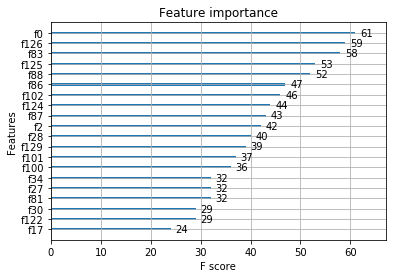

In [1094]:
xgb.plot_importance(bst,max_num_features =20)

In [774]:
# param = {'objective': 'binary:logistic',
#  'colsample_bytree': 0.9683760122352089,
#  'gamma': 0.7790711924812199,
#  'learning_rate': 0.2349426498504554,
#  'max_depth': 28,
#  'min_child_weight': 19.95324500379702,
#  'n_estimators': 150,
#  'objective': 'binary:logistic',
#  'scale_pos_weight': 1,
#  'seed': 42,
#  'eval_metric': ['auc'],
#  'lambda': 2,
#  'alpha': 15,
# #  'rate_drop':0.5,
#  'tree_method':'exact',
#  'normalize_type':'forest',
#  'subsample': 0.9035691355661921}

AttributeError: 'Booster' object has no attribute 'booster'

In [470]:
np.array([0,0,0,0]) + 0.5*np.array([1,0,0,0])

array([0.5, 0. , 0. , 0. ])

In [25]:
# model.best_params_.named_steps['lgb'].best_params_
# model.best_params_.named_steps['reduce_dim']
model.named_steps['lgb'].best_params_

{'colsample_bytree': 0.9683760122352089,
 'gamma': 0.7790711924812199,
 'learning_rate': 0.3649426498504554,
 'max_depth': 28,
 'min_child_weight': 18.95324500379702,
 'n_estimators': 35,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'seed': 42,
 'subsample': 0.9035691355661921}

In [540]:

y_pre.sum()
recall = recall_score(y_val, y_pre,pos_label=1, average=None)
prec = precision_score(y_val, y_pre,pos_label=1, average='binary')

print(recall,prec)
fpr, tpr, thresholds = roc_curve(y_val, y_pre, pos_label=1)
auc(fpr, tpr)

[0.66653831 0.30894309] 0.0420353982300885


0.48774070143473863

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA ,NMF
from sklearn.feature_selection import SelectKBest, chi2

N_FEATURES_OPTIONS = [5 ,10 , 15, 20, 25 , 40 ]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
#         'classify__C': C_OPTIONS
    }
]


In [487]:
estimator = XGBClassifier(nthreads=-1,tree_method='exact')
objective = 'binary:logistic'

# Parameter for XGBoost
params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": st.beta(10, 1),
    "subsample": st.beta(10, 1),
    "gamma": st.uniform(0, 10),
    'objective': [objective],
    'scale_pos_weight': st.randint(0, 2),
    "min_child_weight": st.expon(0, 50),
#     'lambda': st.uniform(0, 20),
#     'alpha': st.uniform(0, 20),
#     'rate_drop':st.uniform(0, 1),
    "seed": [seed],
}
xgb = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = 'f1') 


if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', xgb)]
    xgb = Pipeline(estimators)
    xgb = GridSearchCV(xgb, cv=5, n_jobs=-1, param_grid=param_grid)

In [377]:
estimator = LogisticRegression()
# Parameter for LogisticRegression
params = {
    "penalty": ['l2'],
    "C": [0.001, 0.01, 0.1, 1, 10],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    "max_iter": st.randint(50, 100),
    'random_state': [seed],
} 
log = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter , scoring = 'f1') 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', log)]
    log = Pipeline(estimators)
    log = GridSearchCV(log, cv=5, n_jobs=-1, param_grid=param_grid)

In [378]:
estimator = KNeighborsClassifier()
# Parameter for KNeighborsClassifier
params = {
    "n_neighbors": st.randint(2, 50),
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "leaf_size": st.randint(10, 30),
    "p": st.randint(1, 2),
}
knn = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter_nt , scoring = 'f1')
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', knn)]
    knn = Pipeline(estimators)
#     knn = GridSearchCV(knn, cv=5, n_jobs=-1, param_grid=param_grid)

In [379]:
estimator = RandomForestClassifier()

# Parameter for RandomForestClassifier
params = {
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
rnf = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = 'f1') 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', rnf)]
    rnf = Pipeline(estimators)
    rnf = GridSearchCV(rnf, cv=5, n_jobs=-1, param_grid=param_grid)

In [380]:
estimator = ExtraTreesClassifier()
# 
# Parameter for ExtraTreesClassifier
params = {
    "n_estimators": st.randint(5, 50),
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True],
    "oob_score": [True],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
ext = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = 'f1') 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', ext)]
    ext = Pipeline(estimators)
    ext = GridSearchCV(ext, cv=5, n_jobs=-1, param_grid=param_grid)

In [381]:
estimator = AdaBoostClassifier()

# Parameter for AdaBoost
params = { 
    'n_estimators':st.randint(10, 100), 
    'learning_rate':st.beta(10, 1), 
    'algorithm':['SAMME', 'SAMME.R'],
    'random_state': [seed],
}
ada = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter, scoring = 'f1') 
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', ada)]
    ada = Pipeline(estimators)
    ada = GridSearchCV(ada, cv=5, n_jobs=-1, param_grid=param_grid)

In [382]:
estimator = SVC()

# Parameter for SVC
params = {  
    'C':[0.001, 0.01, 0.1, 1, 10], 
    'degree': st.randint(1, 10),
    'shrinking': [True, False],
    'probability': [True],
    'tol': [1e-3],
    'random_state': [seed],
}
svc = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter_nt, scoring = 'f1')
if(is_pca):
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', svc)]
    svc = Pipeline(estimators)
#     svc = GridSearchCV(svc, cv=5, n_jobs=-1, param_grid=param_grid)

In [383]:
# Parameter for LGBMClassifier
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

estimator = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])




gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40,30],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42,502], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

params = {  
            "boosting_type": ["gbdt","rf","dart"],
            "colsample_bytree": st.beta(10, 1),
            "learning_rate": st.uniform(0.05, 0.4),
            "max_depth": st.randint(3, 30),
            "min_child_weight": st.expon(0, 50),
            "n_estimators": st.randint(3, 40),
            "num_leaves": st.randint(30, 50),
            'objective': ['binary'],
            "subsample": st.beta(10, 1),
            "seed": [seed],
        }

lgb = GridSearchCV(estimator, gridParams, verbose=0, cv=cv,n_jobs=n_jobs , scoring = 'f1')
if(is_pca):
    print('asas')
    estimators = [('reduce_dim', PCA(n_components=n_components, svd_solver='full')), ('clf', lgb)]
    lgb = Pipeline(estimators)
    lgb = GridSearchCV(lgb, cv=5, n_jobs=-1, param_grid=param_grid)
# lgb = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter_nt)

In [504]:
estimator = cb.CatBoostClassifier()
params = {'depth': st.randint(3, 16),
          'learning_rate' : st.uniform(0.05, 0.4),
         'l2_leaf_reg': st.randint(0, 10),
         'iterations': [1]}

cat = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=2, scoring = 'f1') 

In [54]:
x_sm.shape

(16093, 20)

In [385]:
# cat.fit(x_sm,y_sm)
lgb.fit(x_sm,y_sm)

xgb.fit(x_sm,y_sm)
# log.fit(x_sm,y_sm)
# knn.fit(x_sm,y_sm)
rnf.fit(x_sm,y_sm)
ext.fit(x_sm,y_sm)
ada.fit(x_sm,y_sm)

# svc.fit(x_sm,y_sm) 


# y_pre_2 = xgb.predict(x_train)
# f1_2  = f1_score(y_train, y_pre_2, average='binary')
# joblib.dump(xgb, 'xgb.pkl') 
# joblib.dump(log, 'log.pkl') 
# joblib.dump(knn, 'knn.pkl') 
# joblib.dump(rnf, 'rnf.pkl') 
# joblib.dump(ext, 'ext.pkl') 
# joblib.dump(ada, 'ada.pkl') 
# joblib.dump(svc, 'svc.pkl') 
# vote2 = joblib.load('vote.pkl') 



C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000027CF5564DB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\E...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000027CF5564DB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\E...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(1032, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(1032, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (1032, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=1032, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 5, 47, 946442, tzinfo=tzutc()), 'msg_id': '9f00baafe56b427393d7a8e3718872c8', 'msg_type': 'execute_request', 'session': '9e6f204c3a894622813cb47ff1ea5751', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9f00baafe56b427393d7a8e3718872c8', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9e6f204c3a894622813cb47ff1ea5751']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 5, 47, 946442, tzinfo=tzutc()), 'msg_id': '9f00baafe56b427393d7a8e3718872c8', 'msg_type': 'execute_request', 'session': '9e6f204c3a894622813cb47ff1ea5751', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9f00baafe56b427393d7a8e3718872c8', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9e6f204c3a894622813cb47ff1ea5751'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 26, 5, 5, 47, 946442, tzinfo=tzutc()), 'msg_id': '9f00baafe56b427393d7a8e3718872c8', 'msg_type': 'execute_request', 'session': '9e6f204c3a894622813cb47ff1ea5751', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9f00baafe56b427393d7a8e3718872c8', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="# cat.fit(x_sm,y_sm)\nlgb.fit(x_sm,y_sm)\n\nxgb.fit... 'svc.pkl') \n# vote2 = joblib.load('vote.pkl') \n\n", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-385-afd0b0f9ed66>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 27c83cd5550, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000027C83CB79C0, file "<ipython-input-385-afd0b0f9ed66>", line 4>
        result = <ExecutionResult object at 27c83cd5550, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000027C83CB79C0, file "<ipython-input-385-afd0b0f9ed66>", line 4>, result=<ExecutionResult object at 27c83cd5550, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000027C83CB79C0, file "<ipython-input-385-afd0b0f9ed66>", line 4>
        self.user_global_ns = {'ADASYN': <class 'imblearn.over_sampling.adasyn.ADASYN'>, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", 'y_test.shape', "x = data1.to_dict('records')\nx_train = x_train_....('records')\n# y_test = y_test_.to_dict('records')", 'x', 'data1', 'df.apply(lambda x: d[data1.New_WeekDay].fit_transform(data1))', 'from collections import defaultdict\nd = defaultd...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'from sklearn.preprocessing import LabelEncoder\nf...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'class MultiColumnLabelEncoder:\n    def __init__(...):\n        return self.fit(X,y).transform(X)\n    ', 'import pandas as pd\nfrom sklearn.preprocessing i...):\n        return self.fit(X,y).transform(X)\n    ', "\n\nfrom sklearn.preprocessing import LabelEncoder...r(columns = ['New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...egment_code','New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", "MultiColumnLabelEncoder(columns = ['New_gender',...segment_code','New_WeekDay']).transform(x_train_)", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LGBMClassifier': <class 'lightgbm.sklearn.LGBMClassifier'>, 'LabelBinarizer': <class 'sklearn.preprocessing.label.LabelBinarizer'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, ...}
        self.user_ns = {'ADASYN': <class 'imblearn.over_sampling.adasyn.ADASYN'>, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", 'y_test.shape', "x = data1.to_dict('records')\nx_train = x_train_....('records')\n# y_test = y_test_.to_dict('records')", 'x', 'data1', 'df.apply(lambda x: d[data1.New_WeekDay].fit_transform(data1))', 'from collections import defaultdict\nd = defaultd...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'from sklearn.preprocessing import LabelEncoder\nf...(lambda x: d[x.New_WeekDay].fit_transform(data1))', 'class MultiColumnLabelEncoder:\n    def __init__(...):\n        return self.fit(X,y).transform(X)\n    ', 'import pandas as pd\nfrom sklearn.preprocessing i...):\n        return self.fit(X,y).transform(X)\n    ', "\n\nfrom sklearn.preprocessing import LabelEncoder...r(columns = ['New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...egment_code','New_WeekDay']).fit_transform(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "import pandas as pd\n# data = pd.read_csv('IsusV3...est.csv', delimiter = ',').reset_index(drop=True)", "\n\nfrom sklearn.preprocessing import LabelEncoder...y_income_segment_code','New_WeekDay']).fit(data1)", "data1 = data.drop(['Target'], axis=1).fillna(0)\n...xis=1).fillna(0)\ny_test = test[['Target']].values", "MultiColumnLabelEncoder(columns = ['New_gender',...segment_code','New_WeekDay']).transform(x_train_)", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LGBMClassifier': <class 'lightgbm.sklearn.LGBMClassifier'>, 'LabelBinarizer': <class 'sklearn.preprocessing.label.LabelBinarizer'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
D:\techjam\<ipython-input-385-afd0b0f9ed66> in <module>()
      1 # cat.fit(x_sm,y_sm)
      2 lgb.fit(x_sm,y_sm)
      3 
----> 4 xgb.fit(x_sm,y_sm)
      5 # log.fit(x_sm,y_sm)
      6 # knn.fit(x_sm,y_sm)
      7 rnf.fit(x_sm,y_sm)
      8 ext.fit(x_sm,y_sm)
      9 ada.fit(x_sm,y_sm)
     10 

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=5, error_score='raise',
  ...turn_train_score='warn', scoring='f1', verbose=0), X=array([[0.48979592, 0.33333333, 0.62135922, ...,....., 2.        , 4.        ,
        4.        ]]), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=5, random_state=None, shuffle=False)>
        X = array([[0.48979592, 0.33333333, 0.62135922, ...,....., 2.        , 4.        ,
        4.        ]])
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=3), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=3)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Sep 26 12:08:18 2018
PID: 19424            Python 3.6.5: C:\Users\EBM_IT_01\Anaconda3\python.exe
...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (XGBClassifier(base_score=0.5, booster='gbtree', ...e, silent=True, subsample=1, tree_method='exact'), memmap([[0.48979592, 0.33333333, 0.62135922, ......., 2.        , 4.        ,
         4.        ]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), {'score': make_scorer(f1_score)}, array([1077, 1082, 1116, ..., 8573, 8574, 8575]), array([   0,    1,    2, ..., 1761, 1762, 1763]), 0, {'alpha': 17.718291190773904, 'colsample_bytree': 0.7700728996773737, 'gamma': 1.8617608008002795, 'lambda': 17.535101569779478, 'learning_rate': 0.36249346391695625, 'max_depth': 3, 'min_child_weight': 67.80300755133484, 'n_estimators': 15, 'objective': 'binary:logistic', 'rate_drop': 0.29414280136877524, ...}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (XGBClassifier(base_score=0.5, booster='gbtree', ...e, silent=True, subsample=1, tree_method='exact'), memmap([[0.48979592, 0.33333333, 0.62135922, ......., 2.        , 4.        ,
         4.        ]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), {'score': make_scorer(f1_score)}, array([1077, 1082, 1116, ..., 8573, 8574, 8575]), array([   0,    1,    2, ..., 1761, 1762, 1763]), 0, {'alpha': 17.718291190773904, 'colsample_bytree': 0.7700728996773737, 'gamma': 1.8617608008002795, 'lambda': 17.535101569779478, 'learning_rate': 0.36249346391695625, 'max_depth': 3, 'min_child_weight': 67.80300755133484, 'n_estimators': 15, 'objective': 'binary:logistic', 'rate_drop': 0.29414280136877524, ...})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=XGBClassifier(base_score=0.5, booster='gbtree', ...e, silent=True, subsample=1, tree_method='exact'), X=memmap([[0.48979592, 0.33333333, 0.62135922, ......., 2.        , 4.        ,
         4.        ]]), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), scorer={'score': make_scorer(f1_score)}, train=array([1077, 1082, 1116, ..., 8573, 8574, 8575]), test=array([   0,    1,    2, ..., 1761, 1762, 1763]), verbose=0, parameters={'alpha': 17.718291190773904, 'colsample_bytree': 0.7700728996773737, 'gamma': 1.8617608008002795, 'lambda': 17.535101569779478, 'learning_rate': 0.36249346391695625, 'max_depth': 3, 'min_child_weight': 67.80300755133484, 'n_estimators': 15, 'objective': 'binary:logistic', 'rate_drop': 0.29414280136877524, ...}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of XGBCla..., silent=True, subsample=1, tree_method='exact')>
        parameters = {'alpha': 17.718291190773904, 'colsample_bytree': 0.7700728996773737, 'gamma': 1.8617608008002795, 'lambda': 17.535101569779478, 'learning_rate': 0.36249346391695625, 'max_depth': 3, 'min_child_weight': 67.80300755133484, 'n_estimators': 15, 'objective': 'binary:logistic', 'rate_drop': 0.29414280136877524, ...}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\base.py in set_params(self=XGBClassifier(base_score=0.5, booster='gbtree', ...e, silent=True, subsample=1, tree_method='exact'), **params={'alpha': 17.718291190773904, 'colsample_bytree': 0.7700728996773737, 'gamma': 1.8617608008002795, 'lambda': 17.535101569779478, 'learning_rate': 0.36249346391695625, 'max_depth': 3, 'min_child_weight': 67.80300755133484, 'n_estimators': 15, 'objective': 'binary:logistic', 'rate_drop': 0.29414280136877524, ...})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'alpha'
        self = XGBClassifier(base_score=0.5, booster='gbtree', ...e, silent=True, subsample=1, tree_method='exact')
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter alpha for estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, tree_method='exact'). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [67]:
joblib.dump(xgb, 'xgb.pkl') 
joblib.dump(log, 'log.pkl') 
joblib.dump(knn, 'knn.pkl') 
joblib.dump(rnf, 'rnf.pkl') 
joblib.dump(ext, 'ext.pkl') 
joblib.dump(ada, 'ada.pkl') 
joblib.dump(lgb, 'lgb.pkl') 
joblib.dump(svc, 'svc.pkl') 

['svc.pkl']

In [80]:
best_params1 = xgb.best_params_
best_params2 = log.best_params_
best_params3 = knn.best_params_
best_params4 = rnf.best_params_
best_params5 = ext.best_params_
best_params6 = ada.best_params_
best_params7 = lgb.best_params_
best_params8 = svc.best_params_

In [ ]:
best_params1

In [216]:
# xgb = joblib.load('xgb.pkl')
# log = joblib.load('log.pkl') 
# knn = joblib.load('knn.pkl') 
# rnf = joblib.load('rnf.pkl') 
# ext = joblib.load('ext.pkl') 
# ada = joblib.load('ada.pkl') 
# lgb = joblib.load('lgb.pkl') 
# svc = joblib.load('svc.pkl') 

In [200]:
# x_val = x_val[:,np.array([9,10,11,136,148,154,156,158,159])]
# x_train = x_train[:,np.array([9,10,11,136,148,154,156,158,159])]
x_val.shape

(2720, 166)

In [25]:
from sklearn.metrics import f1_score , precision_score , recall_score
y_pre = xgb.predict(x_val)
y_pre_2 = xgb.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'xgb')
y_pre = log.predict(x_val)
y_pre_2 = log.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'log')
y_pre = knn.predict(x_val)
y_pre_2 = knn.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'knn')
y_pre = rnf.predict(x_val)
y_pre_2 = rnf.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'rnf')
y_pre = ext.predict(x_val)
y_pre_2 = ext.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'ext')
y_pre = ada.predict(x_val)
y_pre_2 = ada.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'ada')
y_pre = lgb.predict(x_val)
y_pre_2 = lgb.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'lgb')
y_pre = svc.predict(x_val)
y_pre_2 = svc.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'svc')
y_pre = cat.predict(x_val)
y_pre_2 = cat.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'cat')

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.0 0.0446927374301676 xgb
0.13066385669125394 0.16923076923076924 log
0.09650582362728785 1.0 knn
0.014285714285714287 0.4108761329305136 rnf
0.0 0.9847094801223241 ext
0.031578947368421054 0.08310991957104558 ada


C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.07228915662650603 0.12074001947419669 lgb
0.09850107066381154 0.20235546038543897 svc


In [68]:
a = log.best_estimator_.coef_
a = ada.best_estimator_.feature_importances_
a

array([0.01020408, 0.02040816, 0.02040816, 0.02040816, 0.04081633,
       0.05102041, 0.04081633, 0.04081633, 0.03061224, 0.06122449,
       0.04081633, 0.08163265, 0.04081633, 0.07142857, 0.02040816,
       0.06122449, 0.04081633, 0.06122449, 0.04081633, 0.02040816,
       0.02040816, 0.02040816, 0.03061224, 0.04081633, 0.04081633,
       0.02040816, 0.01020408])

In [289]:
# print(np.argwhere(a>0.01),np.argwhere(a<-0.01))
# print(np.argwhere(a!=0))
b = np.argwhere(a!=0)
# np.reshape(b,(b.shape[]))
b = b.ravel()
print(b,np.array([9,10,11,136,148,154,156,158,159]))

[  5   9  10  31  38  41  42  45  47  48  49  50  51  52  53  55  56  57
  60  65  67  70  74  75  77  80  82  83  84 120 125 129 142 143 144 146
 147 149 152 153 154 158 160 164 170] [  9  10  11 136 148 154 156 158 159]


In [143]:
print(np.argwhere(a>0.01),np.argwhere(a<-0.01))

[[  0   9]
 [  0  10]
 [  0  11]
 [  0 136]
 [  0 148]
 [  0 156]
 [  0 158]
 [  0 159]] [[  0 154]]


In [290]:
x_sm2 = x_sm[:,np.array(b)]
x_sm2.shape

(15018, 45)

In [69]:
re1 = xgb.predict_proba(x_sm)
re2 = log.predict_proba(x_sm)
re3 = knn.predict_proba(x_sm)
re4 = rnf.predict_proba(x_sm)
re5 = ext.predict_proba(x_sm)
re6 = ada.predict_proba(x_sm)
re7 = lgb.predict_proba(x_sm)
re8 = svc.predict_proba(x_sm)

mo1 = 1
mo2 = 1
mo3 = 1
mo4 = 1
mo5 = 1
mo6 = 1
mo7 = 1
mo8 = 1

In [70]:
xx = x_sm

In [84]:
mo1 = 0
mo2 = 1
mo3 = 0
mo4 = 0
mo5 = 0
mo6 = 1
mo7 = 1
mo8 = 1

In [71]:
# test = xgb.predict_proba(x_val)
# test[:,0]


re_1 = re1[:,0]
re_2 = re2[:,0]
re_3 = re3[:,0]
re_4 = re4[:,0]
re_5 = re5[:,0]
re_6 = re6[:,0]
re_7 = re7[:,0]
re_8 = re8[:,0]


re_1 = np.reshape(re_1, (re_1.shape[0],1))
re_2 = np.reshape(re_2, (re_2.shape[0],1))
re_3 = np.reshape(re_3, (re_3.shape[0],1))
re_4 = np.reshape(re_4, (re_4.shape[0],1))
re_5 = np.reshape(re_5, (re_5.shape[0],1))
re_6 = np.reshape(re_6, (re_6.shape[0],1))
re_7 = np.reshape(re_7, (re_7.shape[0],1))
re_8 = np.reshape(re_8, (re_8.shape[0],1))
# xx = x_sm
if(mo1 == 1):
    xx = np.concatenate((xx, re_1), axis=1)
if(mo2 == 1):
    xx = np.concatenate((xx, re_2), axis=1)
if(mo3 == 1):
    xx = np.concatenate((xx, re_3), axis=1)
if(mo4 == 1):
    xx = np.concatenate((xx, re_4), axis=1)
if(mo5 == 1):
    xx = np.concatenate((xx, re_5), axis=1)
if(mo6 == 1):
    xx = np.concatenate((xx, re_6), axis=1)
if(mo7 == 1):
    xx = np.concatenate((xx, re_7), axis=1)
if(mo8 == 1):
    xx = np.concatenate((xx, re_8), axis=1)

In [72]:
xx.shape

(16093, 35)

In [73]:
n_jobs = -1
n_iter = 50
cv = 5
seed=42
# n_features=xx.shape[1]
n_features= xx.shape[1]

estimator = XGBClassifier(nthreads=-1)
objective = 'binary:logistic'

# Parameter for XGBoost
params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 30),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": st.beta(10, 1),
    "subsample": st.beta(10, 1),
    "gamma": st.uniform(0, 10),
    'objective': [objective],
    'scale_pos_weight': st.randint(0, 2),
    "min_child_weight": st.expon(0, 50),
    "seed": [seed],
}
xgb2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter) 

estimator = LogisticRegression()
# Parameter for LogisticRegression
params = {
    "penalty": ['l2'],
    "C": [0.001, 0.01, 0.1, 1, 10],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    "max_iter": st.randint(50, 100),
    'random_state': [seed],
} 
log2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter) 

estimator = RandomForestClassifier()
# Parameter for RandomForestClassifier
params = {
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
rnf2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter) 

estimator = ExtraTreesClassifier()
# Parameter for ExtraTreesClassifier
params = {
    "n_estimators": st.randint(5, 50),
    "max_depth": [3, None],
    "max_features": st.randint(1, n_features),
    "min_samples_split": st.randint(2, 10),
    "min_samples_leaf": st.randint(1, n_features),
    "bootstrap": [True],
    "oob_score": [True],
    "criterion": ["gini", "entropy"],
    'random_state': [seed],
}
ext2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter) 

estimator = AdaBoostClassifier()
# Parameter for AdaBoost
params = { 
    'n_estimators':st.randint(10, 100), 
    'learning_rate':st.beta(10, 1), 
    'algorithm':['SAMME', 'SAMME.R'],
    'random_state': [seed],
}
ada2 = RandomizedSearchCV(estimator, params, cv=cv,n_jobs=n_jobs, n_iter=n_iter)

params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [42,502], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

estimator = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

lgb2 = GridSearchCV(estimator, gridParams, verbose=0, cv=cv,n_jobs=n_jobs)

In [74]:
xgb2.fit(xx,y_sm)
log2.fit(xx,y_sm)
rnf2.fit(xx,y_sm)
ext2.fit(xx,y_sm)
ada2.fit(xx,y_sm)
lgb2.fit(xx,y_sm)


# joblib.dump(xgb2, 'xgb2.pkl') 
# joblib.dump(log2, 'log2.pkl') 
# joblib.dump(rnf2, 'rnf2.pkl') 

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_bin=512,
        max_depth=-1, min_child_samples=5, min_child_weight=1,
        min_split_gain=0.5, n_estimators=100, n_jobs=3, num_leaves=31,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, scale_pos_weight=1, silent=True, subsample=1,
        subsample_for_bin=200, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.005], 'n_estimators': [40], 'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'random_state': [42, 502], 'colsample_bytree': [0.65, 0.66], 'subsample': [0.7, 0.75], 'reg_alpha': [1, 1.2], 'reg_lambda': [1, 1.2, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [274]:
xx.shape

(15018, 179)

In [79]:
vote_list = [('xgb2', xgb2), ('log2', log2), ('rnf2', rnf2), ('ext2', ext2), ('ada2', ada2), ('lgb2', lgb2)]
# vote_list = [ ('log2', log2), ('ada2', ada2), ('lgb2', lgb2)]
vote2 = VotingClassifier(estimators=vote_list, voting='hard')
vote2.fit(xx, y_sm)
# vote2.fit(xx_val, y_val)
# joblib.dump(vote2, 'vote2.pkl') 
# vote2.feature_importances_
y_pre = vote2.predict(xx_val)
y_pre_2 = vote2.predict(xx_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'vote2')

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array

0.04844290657439446 0.07164179104477612 vote2


C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [119]:
xx_val.shape
re_1.shape

(15096, 1)

In [75]:
# xx_val = x_val[:,np.array(b)]
# xx_train = x_train[:,np.array(b)]

xx_val = x_val
xx_train = x_train

# re1 = xgb2.predict_proba(x_sm)
# re2 = log.predict_proba(x_sm)
# re3 = knn.predict_proba(x_sm)

re11 = xgb.predict_proba(x_val)
re12 = log.predict_proba(x_val)
re13 = knn.predict_proba(x_val)
re14 = rnf.predict_proba(x_val)
re15 = ext.predict_proba(x_val)
re16 = ada.predict_proba(x_val)
re17 = lgb.predict_proba(x_val)
re18 = svc.predict_proba(x_val)

re_11 = re11[:,0]
re_12 = re12[:,0]
re_13 = re13[:,0]
re_14 = re14[:,0]
re_15 = re15[:,0]
re_16 = re16[:,0]
re_17 = re17[:,0]
re_18 = re18[:,0]

re_11 = np.reshape(re_11, (re_11.shape[0],1))
re_12 = np.reshape(re_12, (re_12.shape[0],1))
re_13 = np.reshape(re_13, (re_13.shape[0],1))
re_14 = np.reshape(re_14, (re_14.shape[0],1))
re_15 = np.reshape(re_15, (re_15.shape[0],1))
re_16 = np.reshape(re_16, (re_16.shape[0],1))
re_17 = np.reshape(re_17, (re_17.shape[0],1))
re_18 = np.reshape(re_18, (re_18.shape[0],1))




re21 = xgb.predict_proba(x_train)
re22 = log.predict_proba(x_train)
re23 = knn.predict_proba(x_train)
re24 = rnf.predict_proba(x_train)
re25 = ext.predict_proba(x_train)
re26 = ada.predict_proba(x_train)
re27 = lgb.predict_proba(x_train)
re28 = svc.predict_proba(x_train)

re_21 = re21[:,0]
re_22 = re22[:,0]
re_23 = re23[:,0]
re_24 = re24[:,0]
re_25 = re25[:,0]
re_26 = re26[:,0]
re_27 = re27[:,0]
re_28 = re28[:,0]

re_21 = np.reshape(re_21, (re_21.shape[0],1))
re_22 = np.reshape(re_22, (re_22.shape[0],1))
re_23 = np.reshape(re_23, (re_23.shape[0],1))
re_24 = np.reshape(re_24, (re_24.shape[0],1))
re_25 = np.reshape(re_25, (re_25.shape[0],1))
re_26 = np.reshape(re_26, (re_26.shape[0],1))
re_27 = np.reshape(re_27, (re_27.shape[0],1))
re_28 = np.reshape(re_28, (re_28.shape[0],1))

if(mo1 == 1):
    xx_train = np.concatenate((xx_train, re_21), axis=1)
if(mo2 == 1):
    xx_train = np.concatenate((xx_train, re_22), axis=1)
if(mo3 == 1):
    xx_train = np.concatenate((xx_train, re_23), axis=1)
if(mo4 == 1):
    xx_train = np.concatenate((xx_train, re_24), axis=1)
if(mo5 == 1):
    xx_train = np.concatenate((xx_train, re_25), axis=1)
if(mo6 == 1):
    xx_train = np.concatenate((xx_train, re_26), axis=1)
if(mo7 == 1):
    xx_train = np.concatenate((xx_train, re_27), axis=1)
if(mo8 == 1):
    xx_train = np.concatenate((xx_train, re_28), axis=1)

if(mo1 == 1):
    xx_val = np.concatenate((xx_val, re_11), axis=1)
if(mo2 == 1):
    xx_val = np.concatenate((xx_val, re_12), axis=1)
if(mo3 == 1):
    xx_val = np.concatenate((xx_val, re_13), axis=1)
if(mo4 == 1):
    xx_val = np.concatenate((xx_val, re_14), axis=1)
if(mo5 == 1):
    xx_val = np.concatenate((xx_val, re_15), axis=1)
if(mo6 == 1):
    xx_val = np.concatenate((xx_val, re_16), axis=1)
if(mo7 == 1):
    xx_val = np.concatenate((xx_val, re_17), axis=1)
if(mo8 == 1):
    xx_val = np.concatenate((xx_val, re_18), axis=1)

In [76]:
xx_train.shape

(8576, 35)

In [77]:
# xx_train.shape
y_pre = xgb2.predict(xx_val)
y_pre_2 = xgb2.predict(xx_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'xgb2')
y_pre = log2.predict(xx_val)
y_pre_2 = log2.predict(xx_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'log2')
y_pre = rnf2.predict(xx_val)
y_pre_2 = rnf2.predict(xx_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'rnf2')
y_pre = ext2.predict(xx_val)
y_pre_2 = ext2.predict(xx_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'ext2')
y_pre = ada2.predict(xx_val)
y_pre_2 = ada2.predict(xx_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'ada2')
y_pre = lgb2.predict(xx_val)
y_pre_2 = lgb2.predict(xx_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'lgb2')

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.07028753993610223 0.0708133971291866 xgb2
0.03896103896103897 0.07803223070398642 log2
0.0646900269541779 0.0833976833976834 rnf2
0.04142011834319527 0.08019639934533551 ext2
0.05673758865248227 0.07863974495217853 ada2
0.047058823529411764 0.07723911257189811 lgb2


C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.06756756756756756 1.0 vote2


C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
vote2.score(xx, y)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [45]:
# predict process
re1 = xgb.predict(X)
re2 = log.predict(X)
re3 = knn.predict(X)
re4 = rnf.predict(X)
re5 = ext.predict(X)
re6 = ada.predict(X)
re7 = svc.predict(X)

re_1 = np.reshape(re1, (re1.shape[0],1))
re_2 = np.reshape(re2, (re2.shape[0],1))
re_3 = np.reshape(re3, (re3.shape[0],1))
re_4 = np.reshape(re4, (re4.shape[0],1))
re_5 = np.reshape(re5, (re5.shape[0],1))
re_6 = np.reshape(re6, (re6.shape[0],1))
re_7 = np.reshape(re7, (re7.shape[0],1))

xx = np.concatenate((xx, re_1), axis=1)
xx = np.concatenate((xx, re_2), axis=1)
xx = np.concatenate((xx, re_3), axis=1)
xx = np.concatenate((xx, re_4), axis=1)
xx = np.concatenate((xx, re_5), axis=1)
xx = np.concatenate((xx, re_6), axis=1)
xx = np.concatenate((xx, re_7), axis=1)
print(xx,xx.shape)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[  6.46907649   4.25070317  -8.63694437 ...  85.          69.
   85.        ]
 [  6.48856404   9.37957037  10.32791736 ...  64.          69.
   64.        ]
 [  8.37392753 -10.14342267  -3.52753613 ...  93.          69.
   93.        ]
 ...
 [  7.86551596   6.19525794   4.773955   ...  98.          69.
   98.        ]
 [-10.41156442   1.40054826  -1.97349572 ...  80.          67.
   80.        ]
 [  7.40908901  -7.3908382   10.78350645 ...  91.          69.
   91.        ]] (10000, 31)


In [ ]:
y_final = vote2.predect()

In [ ]:
f1_score(y_val, y_final, average='macro')

In [233]:
y_sm2.shape

(3790,)

In [82]:
xgb = XGBClassifier(**best_params1)
log = LogisticRegression(**best_params2)
knn = KNeighborsClassifier(**best_params3)
rnf = RandomForestClassifier(**best_params4)
ext = ExtraTreesClassifier(**best_params5)
ada = AdaBoostClassifier(**best_params6)
lgb = LGBMClassifier(**best_params7)
svc = SVC(**best_params8)

In [355]:
x_val.shape

(2720, 172)

In [3]:
s = []
s.append(('xgb', 56))
s

[('xgb', 56)]

In [84]:
vote_list = [('xgb', xgb), ('log', log), ('knn', knn), ('rnf', rnf), ('ext', ext), ('ada', ada), ('svc', svc),('lgb',lgb)]
# vote_list = [('xgb', xgb), ('log', log), ('knn', knn), ('rnf', rnf), ('ext', ext), ('ada', ada), ('lgb',lgb)]
# vote_list = [('log', log), ('ada', ada), ('lgb',lgb)]
vote = VotingClassifier(estimators=vote_list, voting='hard')
vote.fit(x_sm, y_sm)
# vote.fit(x_val, y_val)
# y_pre = vote.predict(x_sm)
y_pre = vote.predict(x_val)
y_pre_2 = vote.predict(x_train)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train, y_pre_2, average='binary')
print(f1,f1_2,'vote')

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

0.06493506493506494 0.07460035523978685 vote


C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [235]:
y_pre = vote.predict(x_val)
y_pre_2 = vote.predict(x_train2)
f1  = f1_score(y_val, y_pre, average='binary')
f1_2  = f1_score(y_train2, y_pre_2, average='binary')
print(f1,f1_2,'vote')

C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.011363636363636364 0.9952153110047847 vote


C:\Users\EBM_IT_01\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
xgb.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00546448,
       0.        , 0.0273224 , 0.01092896, 0.00546448, 0.01092896,
       0.00546448, 0.00546448, 0.03278688, 0.04918033, 0.01639344,
       0.00546448, 0.03278688, 0.01092896, 0.01092896, 0.        ,
       0.        , 0.        , 0.01639344, 0.00546448, 0.01639344,
       0.01639344, 0.01092896, 0.00546448, 0.00546448, 0.        ,
       0.01639344, 0.02185792, 0.02185792, 0.01092896, 0.01092896,
       0.00546448, 0.        , 0.        , 0.00546448, 0.        ,
       0.        , 0.        , 0.        , 0.00546448, 0.        ,
       0.        , 0.        , 0.        , 0.00546448, 0.        ,
       0.01639344, 0.        , 0.00546448, 0.        , 0.        ,
       0.00546448, 0.        , 0.        , 0.00546448, 0.        ,
       0.00546448, 0.        , 0.00546448, 0.        , 0.        ,
       0.        , 0.00546448, 0.        , 0.01092896, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
y_pre

array([85, 64, 93, ..., 98, 80, 91])

In [68]:
from sklearn.metrics import f1_score , precision_score , recall_score

In [63]:
f1_score(y, y_pre, average='binary')

0.0032520325203252032

1.0

In [72]:
recall_score(y, y_pre,pos_label=1, average=None)
precision_score(y, y_pre,pos_label=1, average='binary')

array([1.        , 0.00162866])

In [62]:
print(y,y_pre)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] [0. 0. 0. ... 0. 0. 0.]


In [76]:
y_pre.sum()

1.0

In [57]:
joblib.dump(vote, 'vote.pkl') 
vote2 = joblib.load('vote.pkl') 

['vote.pkl']

In [25]:
vote2 = joblib.load('vote.pkl') 

In [26]:
vote2.score(X, y)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [27]:
vote2

VotingClassifier(estimators=[('xgb', RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
 ...obs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)